## Temperature Forecast Project using ML
###  Problem Statement:

### Data Set Information:

    This data is for the purpose of bias correction of next-day maximum and minimum air temperatures forecast of the LDAPS model operated by the Korea Meteorological Administration over Seoul, South Korea. This data consists of summer data from 2013 to 2017. The input data is largely composed of the LDAPS model's next-day forecast data, in-situ maximum and minimum temperatures of present-day, and geographic auxiliary variables. There are two outputs (i.e. next-day maximum and minimum air temperatures) in this data. Hindcast validation was conducted for the period from 2015 to 2017.


   #### Attribute Information:

    For more information, read [Cho et al, 2020].
    1. station - used weather station number: 1 to 25
    2. Date - Present day: yyyy-mm-dd ('2013-06-30' to '2017-08-30')
    3. Present_Tmax - Maximum air temperature between 0 and 21 h on the present day (Â°C): 20 to 37.6
    4. Present_Tmin - Minimum air temperature between 0 and 21 h on the present day (Â°C): 11.3 to 29.9
    5. LDAPS_RHmin - LDAPS model forecast of next-day minimum relative humidity (%): 19.8 to 98.5
    6. LDAPS_RHmax - LDAPS model forecast of next-day maximum relative humidity (%): 58.9 to 100
    7. LDAPS_Tmax_lapse - LDAPS model forecast of next-day maximum air temperature applied lapse rate (Â°C): 17.6 to 38.5
    8. LDAPS_Tmin_lapse - LDAPS model forecast of next-day minimum air temperature applied lapse rate (Â°C): 14.3 to 29.6
    9. LDAPS_WS - LDAPS model forecast of next-day average wind speed (m/s): 2.9 to 21.9
    10. LDAPS_LH - LDAPS model forecast of next-day average latent heat flux (W/m2): -13.6 to 213.4
    11. LDAPS_CC1 - LDAPS model forecast of next-day 1st 6-hour split average cloud cover (0-5 h) (%): 0 to 0.97
    12. LDAPS_CC2 - LDAPS model forecast of next-day 2nd 6-hour split average cloud cover (6-11 h) (%): 0 to 0.97
    13. LDAPS_CC3 - LDAPS model forecast of next-day 3rd 6-hour split average cloud cover (12-17 h) (%): 0 to 0.98
    14. LDAPS_CC4 - LDAPS model forecast of next-day 4th 6-hour split average cloud cover (18-23 h) (%): 0 to 0.97
    15. LDAPS_PPT1 - LDAPS model forecast of next-day 1st 6-hour split average precipitation (0-5 h) (%): 0 to 23.7
    16. LDAPS_PPT2 - LDAPS model forecast of next-day 2nd 6-hour split average precipitation (6-11 h) (%): 0 to 21.6
    17. LDAPS_PPT3 - LDAPS model forecast of next-day 3rd 6-hour split average precipitation (12-17 h) (%): 0 to 15.8
    18. LDAPS_PPT4 - LDAPS model forecast of next-day 4th 6-hour split average precipitation (18-23 h) (%): 0 to 16.7
    19. lat - Latitude (Â°): 37.456 to 37.645
    20. lon - Longitude (Â°): 126.826 to 127.135
    21. DEM - Elevation (m): 12.4 to 212.3
    22. Slope - Slope (Â°): 0.1 to 5.2
    23. Solar radiation - Daily incoming solar radiation (wh/m2): 4329.5 to 5992.9
    24. Next_Tmax - The next-day maximum air temperature (Â°C): 17.4 to 38.9
    25. Next_Tmin - The next-day minimum air temperature (Â°C): 11.3 to 29.8T

  #### Please note that there are two target variables here: 

    1) Next_Tmax: Next day maximum temperature

    2) Next_Tmin: Next day  minimum temperature




### DATA PREPARATION:
     - loading Data
     - analyze the data and its dtypes
     - check for missing values.
     - check for realistic irregularities.
     - Feature engineering if required

In [428]:
#IMPORTS

plt.style.use('fivethirtyeight')
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

from sklearn.multioutput import MultiOutputRegressor
from sklearn.model_selection import train_test_split,GridSearchCV,RandomizedSearchCV,cross_val_score
from sklearn.linear_model import LinearRegression, Ridge , Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.svm import SVR, LinearSVR
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor


from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [5]:
train = pd.read_csv('tempreture.csv')

In [6]:
train.head() 


,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
0,1.0,30-06-2013,28.7,21.4,58.255688,91.116364,28.074101,23.006936,6.818887,69.451805,...,0.0,0.0,0.0,37.6046,126.991,212.3350,2.7850,5992.895996,29.1,21.2
1,2.0,30-06-2013,31.9,21.6,52.263397,90.604721,29.850689,24.035009,5.691890,51.937448,...,0.0,0.0,0.0,37.6046,127.032,44.7624,0.5141,5869.312500,30.5,22.5
2,3.0,30-06-2013,31.6,23.3,48.690479,83.973587,30.091292,24.565633,6.138224,20.573050,...,0.0,0.0,0.0,37.5776,127.058,33.3068,0.2661,5863.555664,31.1,23.9
3,4.0,30-06-2013,32.0,23.4,58.239788,96.483688,29.704629,23.326177,5.650050,65.727144,...,0.0,0.0,0.0,37.6450,127.022,45.7160,2.5348,5856.964844,31.7,24.3
4,5.0,30-06-2013,31.4,21.9,56.174095,90.155128,29.113934,23.486480,5.735004,107.965535,...,0.0,0.0,0.0,37.5507,127.135,35.0380,0.5055,5859.552246,31.2,22.5


In [7]:
train.shape

(7752, 25)

In [8]:
train.describe()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,LDAPS_PPT2,LDAPS_PPT3,LDAPS_PPT4,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin
count,7750.000000,7682.000000,7682.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000,...,7677.000000,7677.000000,7677.000000,7752.000000,7752.000000,7752.000000,7752.000000,7752.000000,7725.000000,7725.000000
mean,13.000000,29.768211,23.225059,56.759372,88.374804,29.613447,23.512589,7.097875,62.505019,0.368774,...,0.485003,0.278200,0.269407,37.544722,126.991397,61.867972,1.257048,5341.502803,30.274887,22.932220
std,7.211568,2.969999,2.413961,14.668111,7.192004,2.947191,2.345347,2.183836,33.730589,0.262458,...,1.762807,1.161809,1.206214,0.050352,0.079435,54.279780,1.370444,429.158867,3.128010,2.487613
min,1.000000,20.000000,11.300000,19.794666,58.936283,17.624954,14.272646,2.882580,-13.603212,0.000000,...,0.000000,0.000000,0.000000,37.456200,126.826000,12.370000,0.098475,4329.520508,17.400000,11.300000
25%,7.000000,27.800000,21.700000,45.963543,84.222862,27.673499,22.089739,5.678705,37.266753,0.146654,...,0.000000,0.000000,0.000000,37.510200,126.937000,28.700000,0.271300,4999.018555,28.200000,21.300000
50%,13.000000,29.900000,23.400000,55.039024,89.793480,29.703426,23.760199,6.547470,56.865482,0.315697,...,0.000000,0.000000,0.000000,37.550700,126.995000,45.716000,0.618000,5436.345215,30.500000,23.100000
75%,19.000000,32.000000,24.900000,67.190056,93.743629,31.710450,25.152909,8.032276,84.223616,0.575489,...,0.018364,0.007896,0.000041,37.577600,127.042000,59.832400,1.767800,5728.316406,32.600000,24.600000
max,25.000000,37.600000,29.900000,98.524734,100.000153,38.542255,29.619342,21.857621,213.414006,0.967277,...,21.621661,15.841235,16.655469,37.645000,127.135000,212.335000,5.178230,5992.895996,38.900000,29.800000


#### OBSERVATIONS
    - Std is low  for most fo the features suggesting less skewness present in data.
    - 2 Target Columns Next_Tmax, Next_Tmin 
    - 

In [9]:
for i in train.columns:
    print(train[i].value_counts())

25.0    310
12.0    310
2.0     310
3.0     310
4.0     310
5.0     310
6.0     310
7.0     310
8.0     310
9.0     310
10.0    310
11.0    310
13.0    310
23.0    310
14.0    310
15.0    310
16.0    310
18.0    310
20.0    310
22.0    310
24.0    310
17.0    310
19.0    310
21.0    310
1.0     310
Name: station, dtype: int64
31-07-2015    25
15-08-2014    25
05-07-2015    25
19-07-2015    25
29-07-2015    25
              ..
07-07-2013    25
10-08-2017    25
04-07-2017    25
30-08-2014    25
21-07-2015    25
Name: Date, Length: 310, dtype: int64
31.4    112
29.4    111
29.1    108
29.7    107
30.6    105
       ... 
36.4      1
20.7      1
20.4      1
20.3      1
21.2      1
Name: Present_Tmax, Length: 167, dtype: int64
24.0    161
23.8    153
23.1    144
23.5    143
23.3    142
       ... 
13.5      1
15.0      1
13.6      1
14.2      1
29.6      1
Name: Present_Tmin, Length: 155, dtype: int64
51.810596    2
71.658089    2
77.030350    2
98.524734    2
19.794666    2
            ..
4

#### OBSERVATIONS:
    - All the Categorical columns are balanced.
    - Date Feature need to be treated , convert it into datetime object and month, year,day is extracted.

In [11]:
#Creating Datetime object and extracting day,month, year 

In [12]:
train['Date'] = pd.to_datetime(train['Date'])

In [16]:
train['Date_day'] = train['Date'].apply(lambda x: x.day)
train['Date_month'] = train['Date'].apply(lambda x: x.month)
train['Date_year'] = train['Date'].apply(lambda x: x.year)

In [26]:
train['Date'] = train['Date'].apply(lambda x: str(x).replace('-','').split()[0])

In [32]:
train['Date'] = train['Date'].apply(lambda x: np.NAN if x =='NaT'else x)

###### MISSING VALUES CHECK

<AxesSubplot:>

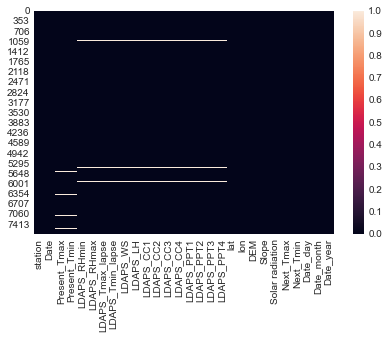

In [103]:
sb.heatmap(train.isnull())

------------ VERY LESS NO OF NULL VALUES WHICH CAN BE FILLED UP WITH MODE OR MEAN)

In [31]:
(train.isnull()).sum(axis=0)

station              2
Date                 2
Present_Tmax        70
Present_Tmin        70
LDAPS_RHmin         75
LDAPS_RHmax         75
LDAPS_Tmax_lapse    75
LDAPS_Tmin_lapse    75
LDAPS_WS            75
LDAPS_LH            75
LDAPS_CC1           75
LDAPS_CC2           75
LDAPS_CC3           75
LDAPS_CC4           75
LDAPS_PPT1          75
LDAPS_PPT2          75
LDAPS_PPT3          75
LDAPS_PPT4          75
lat                  0
lon                  0
DEM                  0
Slope                0
Solar radiation      0
Next_Tmax           27
Next_Tmin           27
Date_day             2
Date_month           2
Date_year            2
dtype: int64


### EXPLORATARY DATA ANALYSIS
 
 
 ##### Univariante Analysis

In [144]:
categorical_col = [ 'lat','lon','Date','station','DEM','Slope','Date_day',
       'Date_month', 'Date_year']

In [84]:
columns = [ 'Present_Tmax', 'Present_Tmin', 'LDAPS_RHmin',
       'LDAPS_RHmax', 'LDAPS_Tmax_lapse', 'LDAPS_Tmin_lapse', 'LDAPS_WS',
       'LDAPS_LH', 'LDAPS_CC1', 'LDAPS_CC2', 'LDAPS_CC3', 'LDAPS_CC4',
       'LDAPS_PPT1', 'LDAPS_PPT2', 'LDAPS_PPT3', 'LDAPS_PPT4', 
        'Solar radiation']
target = [ 'Next_Tmax', 'Next_Tmin']


17

##### Visualizing  Target Variable

In [76]:
plt.style.use('seaborn-darkgrid')

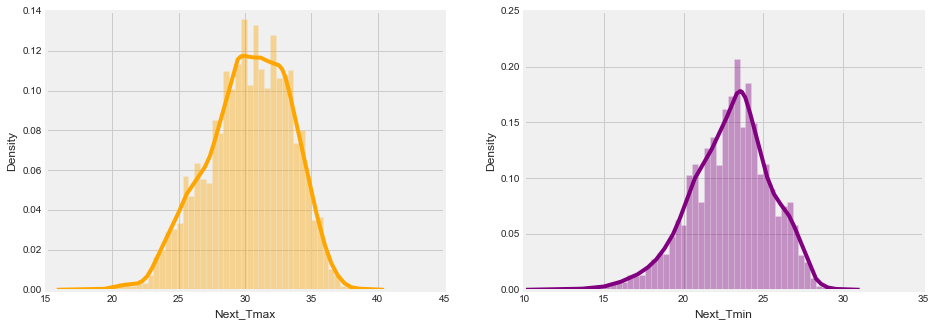

In [115]:
###count plot of Gender categroy and w.r.t to Target Variable
fig,ax =plt.subplots(1,2, figsize=(14,5))

sb.distplot(train['Next_Tmax'], ax=ax[0],color='orange')

sb.distplot(train['Next_Tmin'], ax=ax[1],color='purple')

fig.show()

#### OBSERVATIONS:
    - TARGET CLASSES follow gaussian structure  with no skewness.

#### DIstribution of Continous Features.

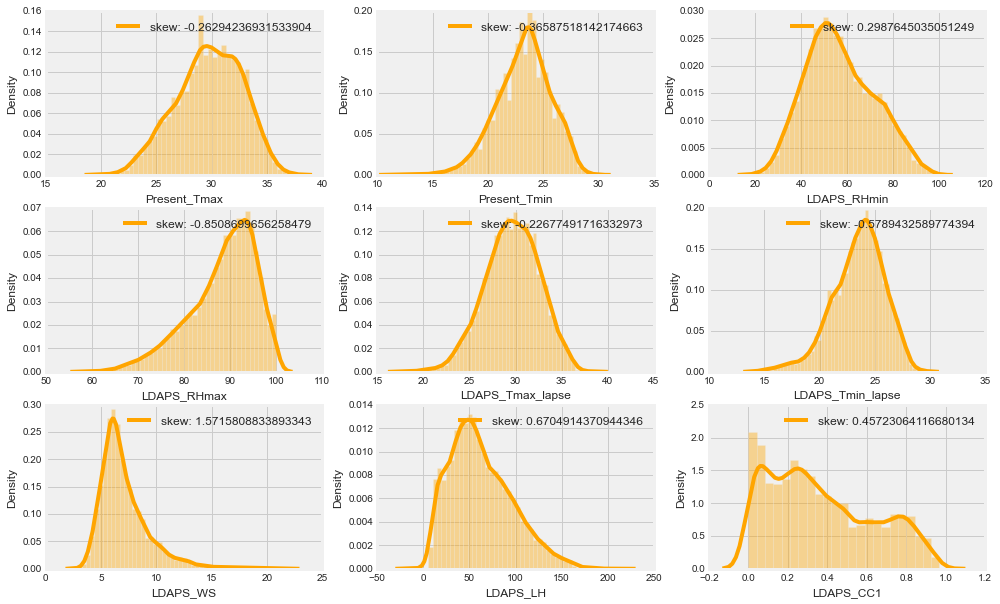

In [105]:
#Distribution plots of Continous Features to see spread of data.

plt.figure(figsize=(15,10))
k =1
for i in columns[:9]:
    plt.subplot(3,3,k)
    
    sb.distplot(train[i],color='orange')
    plt.legend(['skew: '+str(train[i].skew())])
    k = k+1

###### OBSERVATIONS
    LDAPS features are moderately skewed.

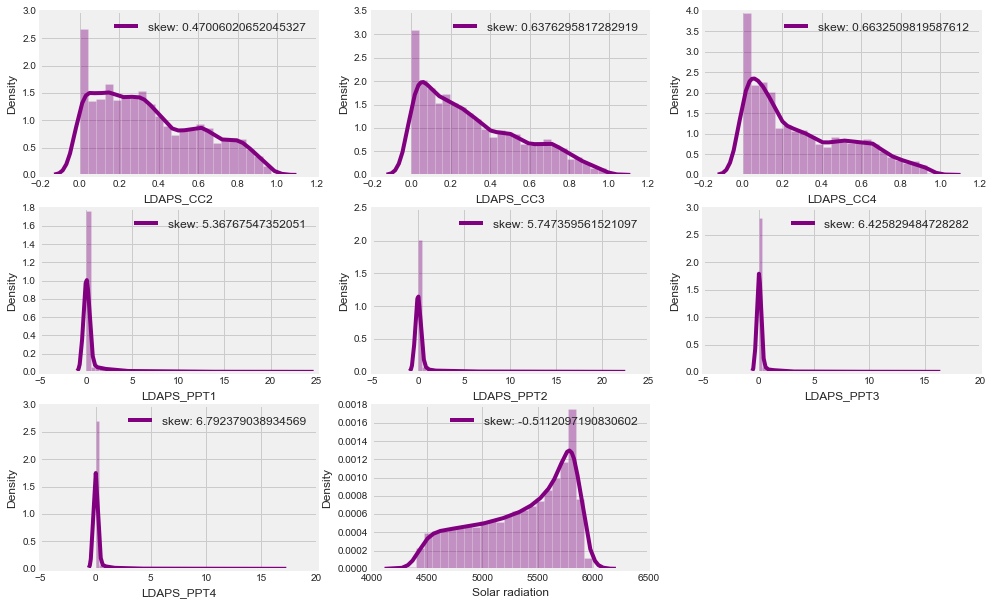

In [137]:
#Distribution plots of Continous Features to see spread of data.

plt.figure(figsize=(15,10))
k =1
for i in columns[9:]:
    plt.subplot(3,3,k)
    
    sb.distplot(train[i],color='purple')
    plt.legend(['skew: '+str(train[i].skew())])
    k = k+1

##### OBSERVATIONS
    LDAPS FEATURES , LDAPS PPT1,2,3,4 are highly skewed with vlaues highly belonging to 0.

<AxesSubplot:xlabel='Date', ylabel='Density'>

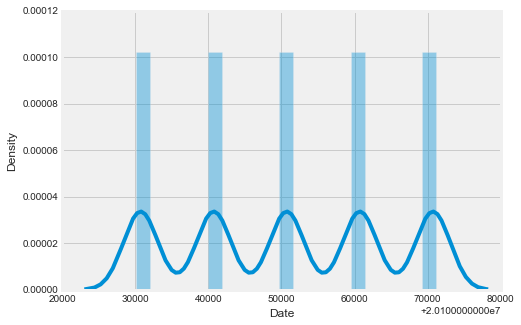

In [150]:
plt.figure(figsize=(7,5))
sb.distplot(train['Date'])

#### OBSERVATIONS:
    - Date has Equal spread of data over the Years, we can drop this feature as we have extracted all the necessary information from the Date Feature.
    
### Spread of Categorical Features.

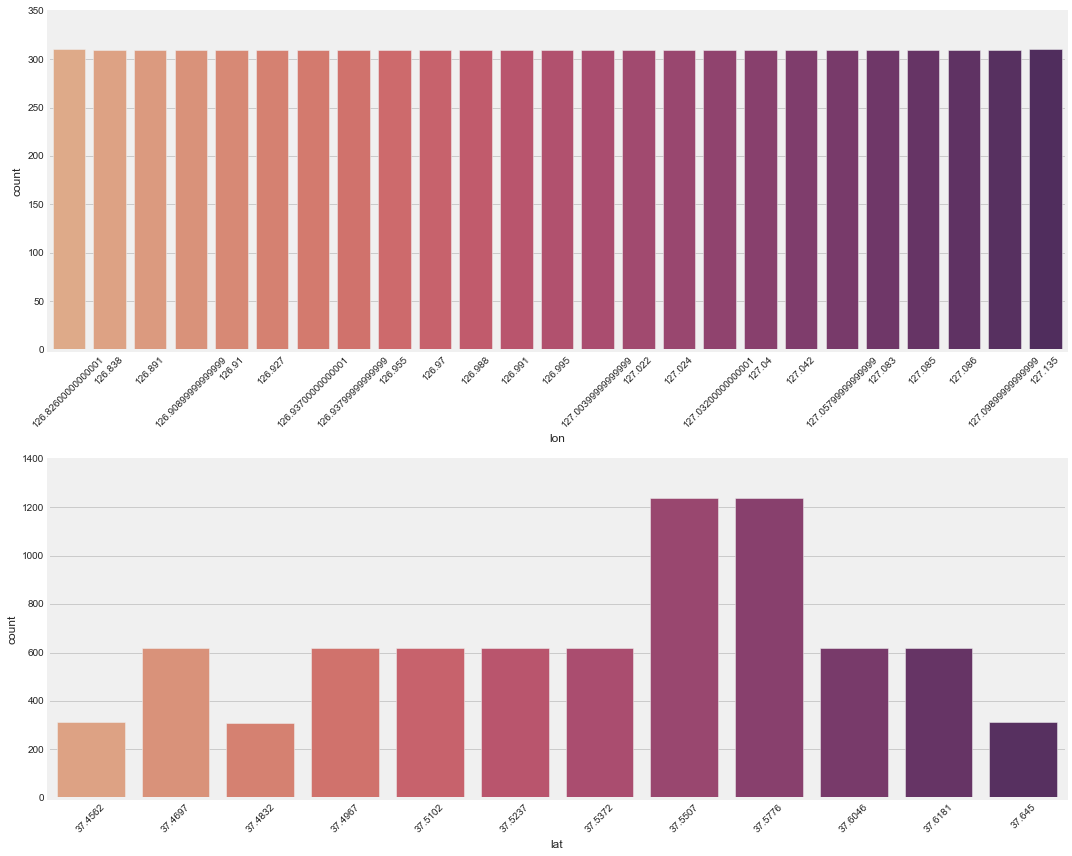

In [147]:
plt.figure(figsize=(15,12))
c=1
for i in['lon','lat']:
   
    plt.subplot(2,1,c)
    c=c+1
    sb.countplot(train[i],palette='flare')
    plt.xticks(rotation=45)
plt.tight_layout()
   

        ----------- Lat with 37.55,37.57 has highest Data Count. Lon has Balanced Data.-----------

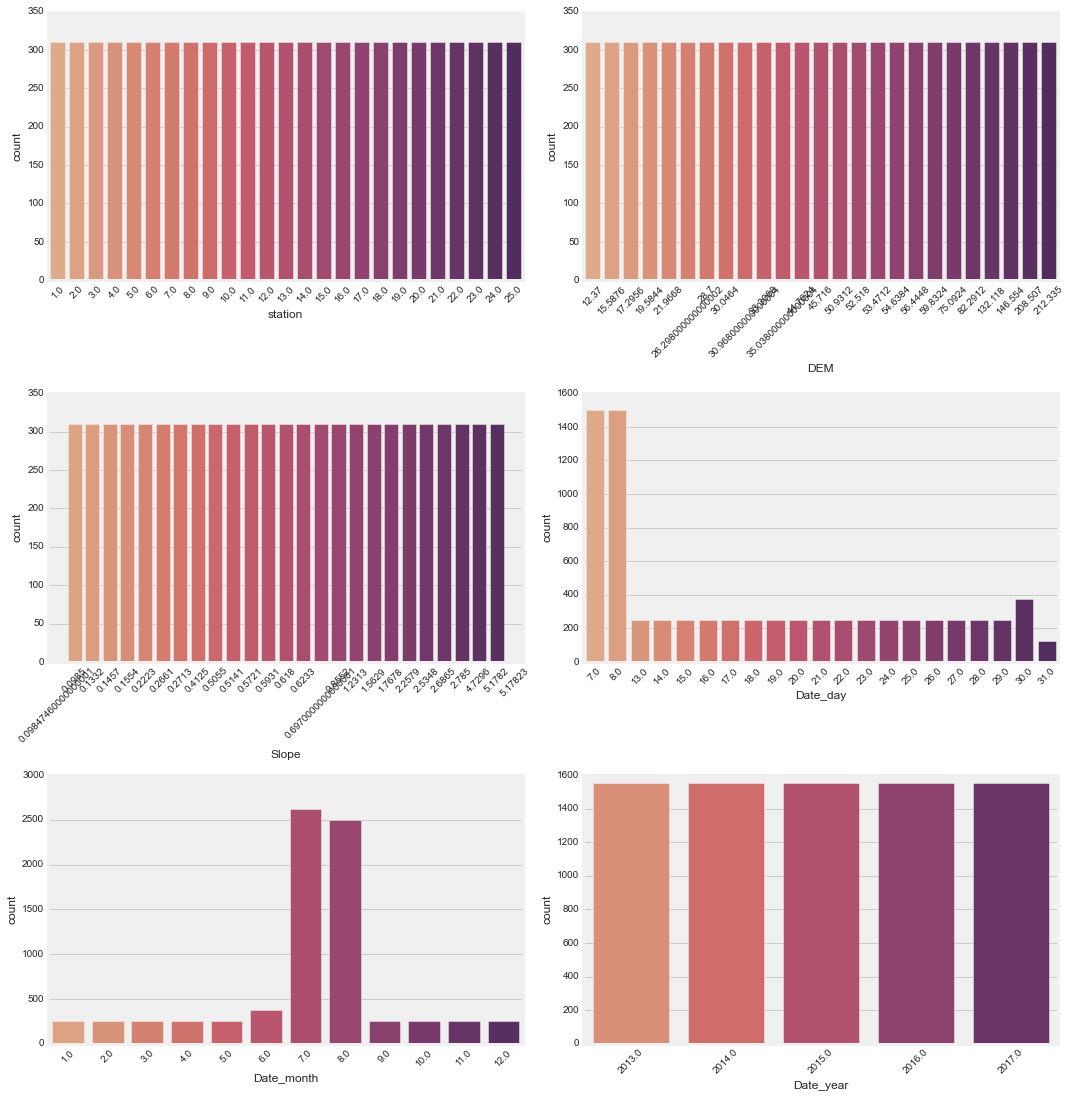

In [152]:
plt.figure(figsize=(15,20))
c=1
for i in categorical_col[3:]:
   
    plt.subplot(4,2,c)
    c=c+1
    sb.countplot(train[i],palette='flare')
    plt.xticks(rotation=45)
plt.tight_layout()
   

#### OBSERVATIONS:
    - Most of the Features have balanced Data. Few features like Date_month has highest Data on 7,8  month.
    - Date_day has highest Data for 7,8 Day of a month.
    

### BIVAIRANTE ANALYSIS

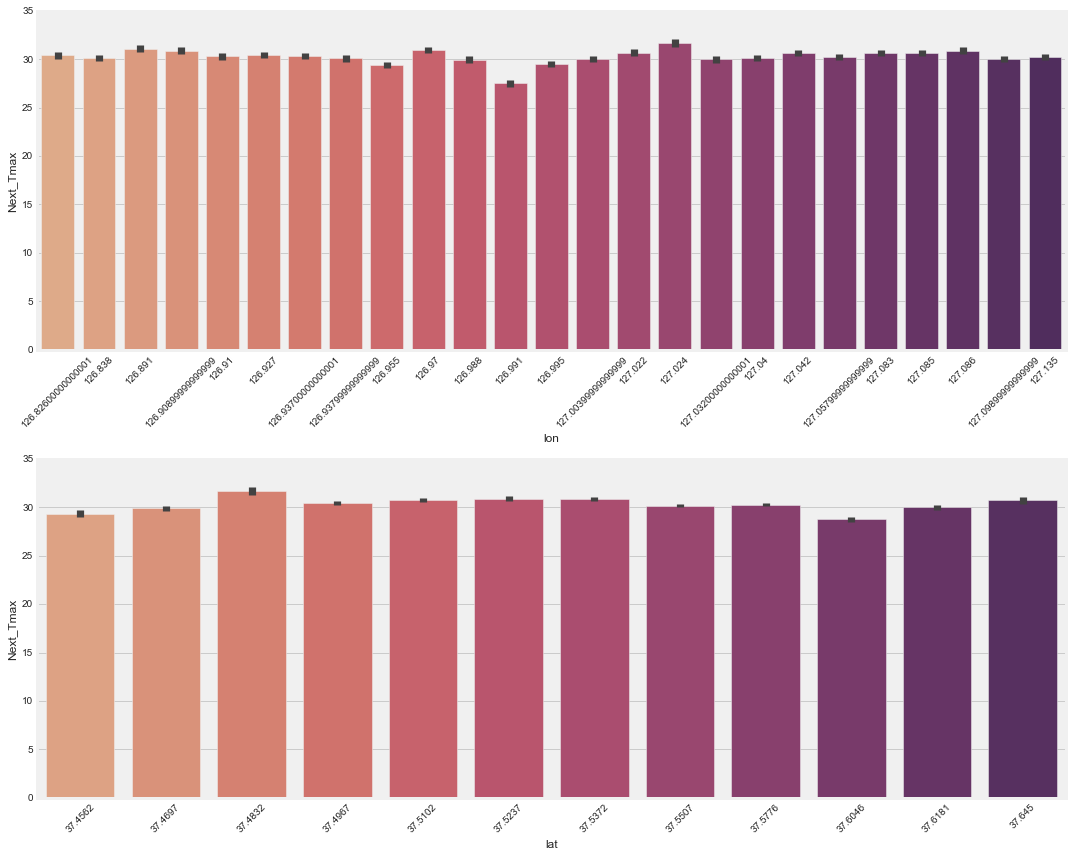

In [136]:
plt.figure(figsize=(15,12))
c=1
for i in['lon','lat']:
   
    plt.subplot(2,1,c)
    c=c+1
    sb.barplot(train[i],train['Next_Tmax'],palette='flare')
    plt.xticks(rotation=45)
plt.tight_layout()
   

#### OBSERVATIONS:
    - lat has highest count of 37.5507 and 37.5776
    - lon has equally balanced classes

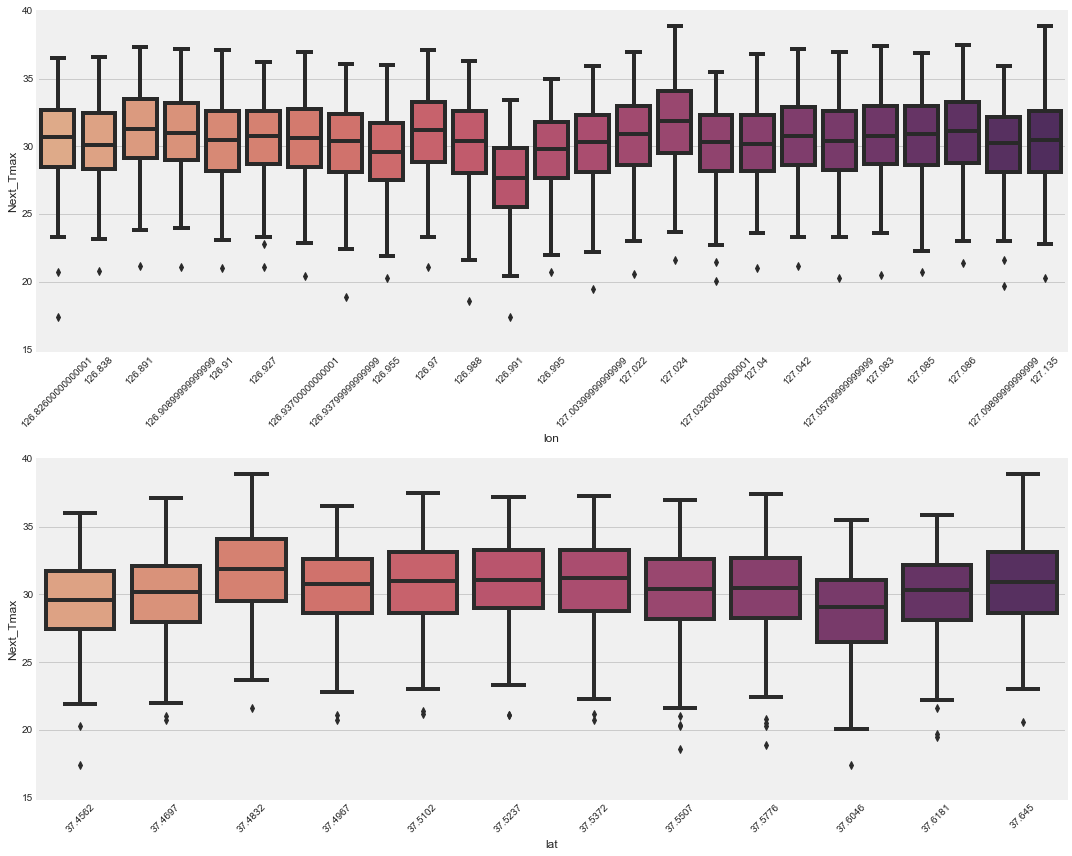

In [126]:
plt.figure(figsize=(15,12))
c=1
for i in['lon','lat']:
   
    plt.subplot(2,1,c)
    c=c+1
    sb.boxplot(train[i],train['Next_Tmax'],palette='flare')
    plt.xticks(rotation=45)
plt.tight_layout()
   

##### OBSERVATIONS:
    - Lat  with 37.6046 has lowest Next_Tmax median temperature. Lat 37.4432 has highest median Next_Tmax.
    - lon 126.991 has lowest median average next_Tmax. 127.024 has highest median average of Next_Tmax

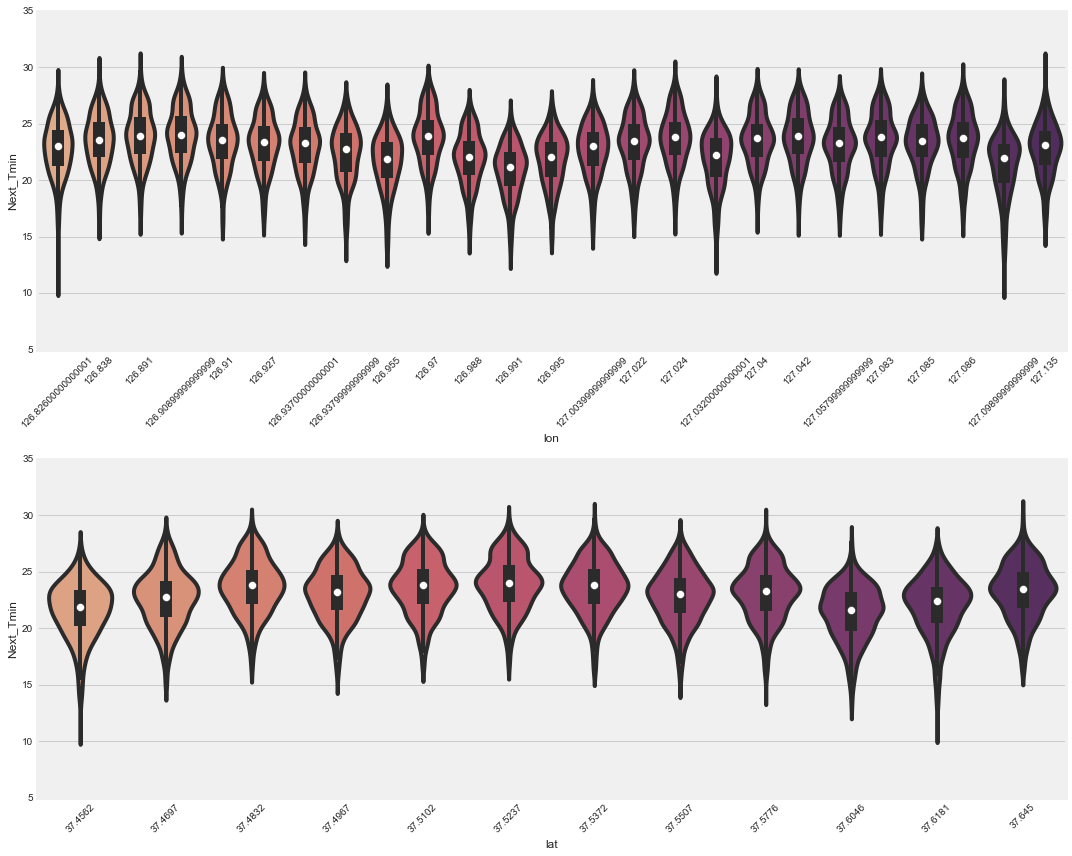

In [127]:
plt.figure(figsize=(15,12))
c=1
for i in['lon','lat']:
   
    plt.subplot(2,1,c)
    c=c+1
    sb.violinplot(train[i],train['Next_Tmin'],palette='flare')
    plt.xticks(rotation=45)
plt.tight_layout()
   

##### OBSERVATIONS:
    - lon  with 127.09899999 has lowest Next_Tmax median temperature. Many lat have highest next_max.
    - lat 37.4562 has lowest median average next_Tmax. Many Have  highest median average of Next_Tmax

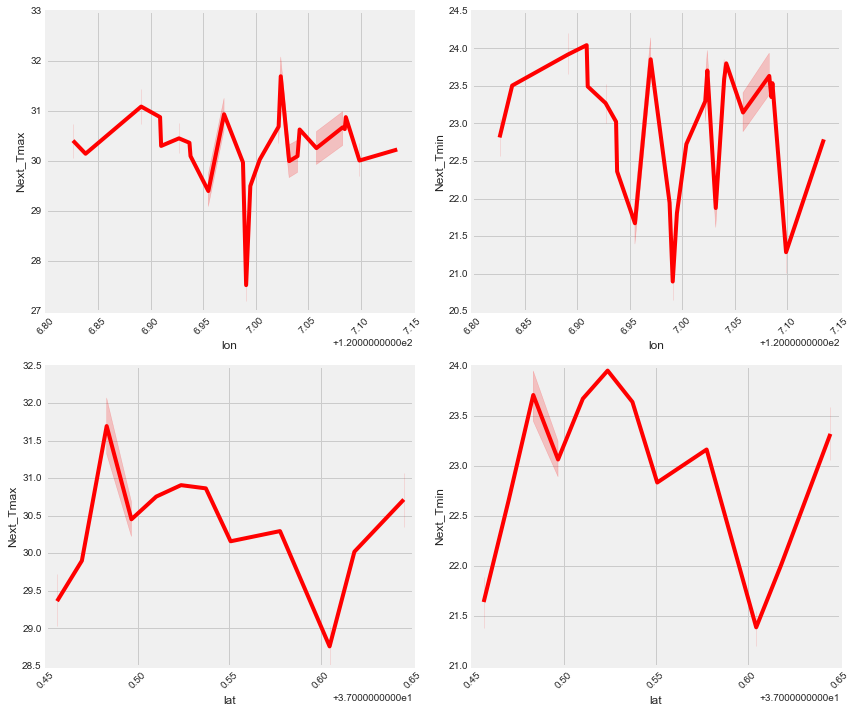

In [133]:
plt.figure(figsize=(12,10))
c=1
for i in['lon','lat']:
    for j in ['Next_Tmax','Next_Tmin']:
   
        plt.subplot(2,2,c)
        c=c+1
        sb.lineplot(train[i],train[j],color='red')
        plt.xticks(rotation=45)
plt.tight_layout()
   

#### OBSERVATIONS:
    - For low value of latitude , nextTmax temp is highest and high value of lat , nextT max is lowest.
    - for nextT min has only lowtemp for 37.45 and 37.60 ranges.
    - lon and next max Temp are in one range except for 127.01 range lowest value of Temp. Where ax lon and min Temp some range for high minTemp and some for low minTemp.

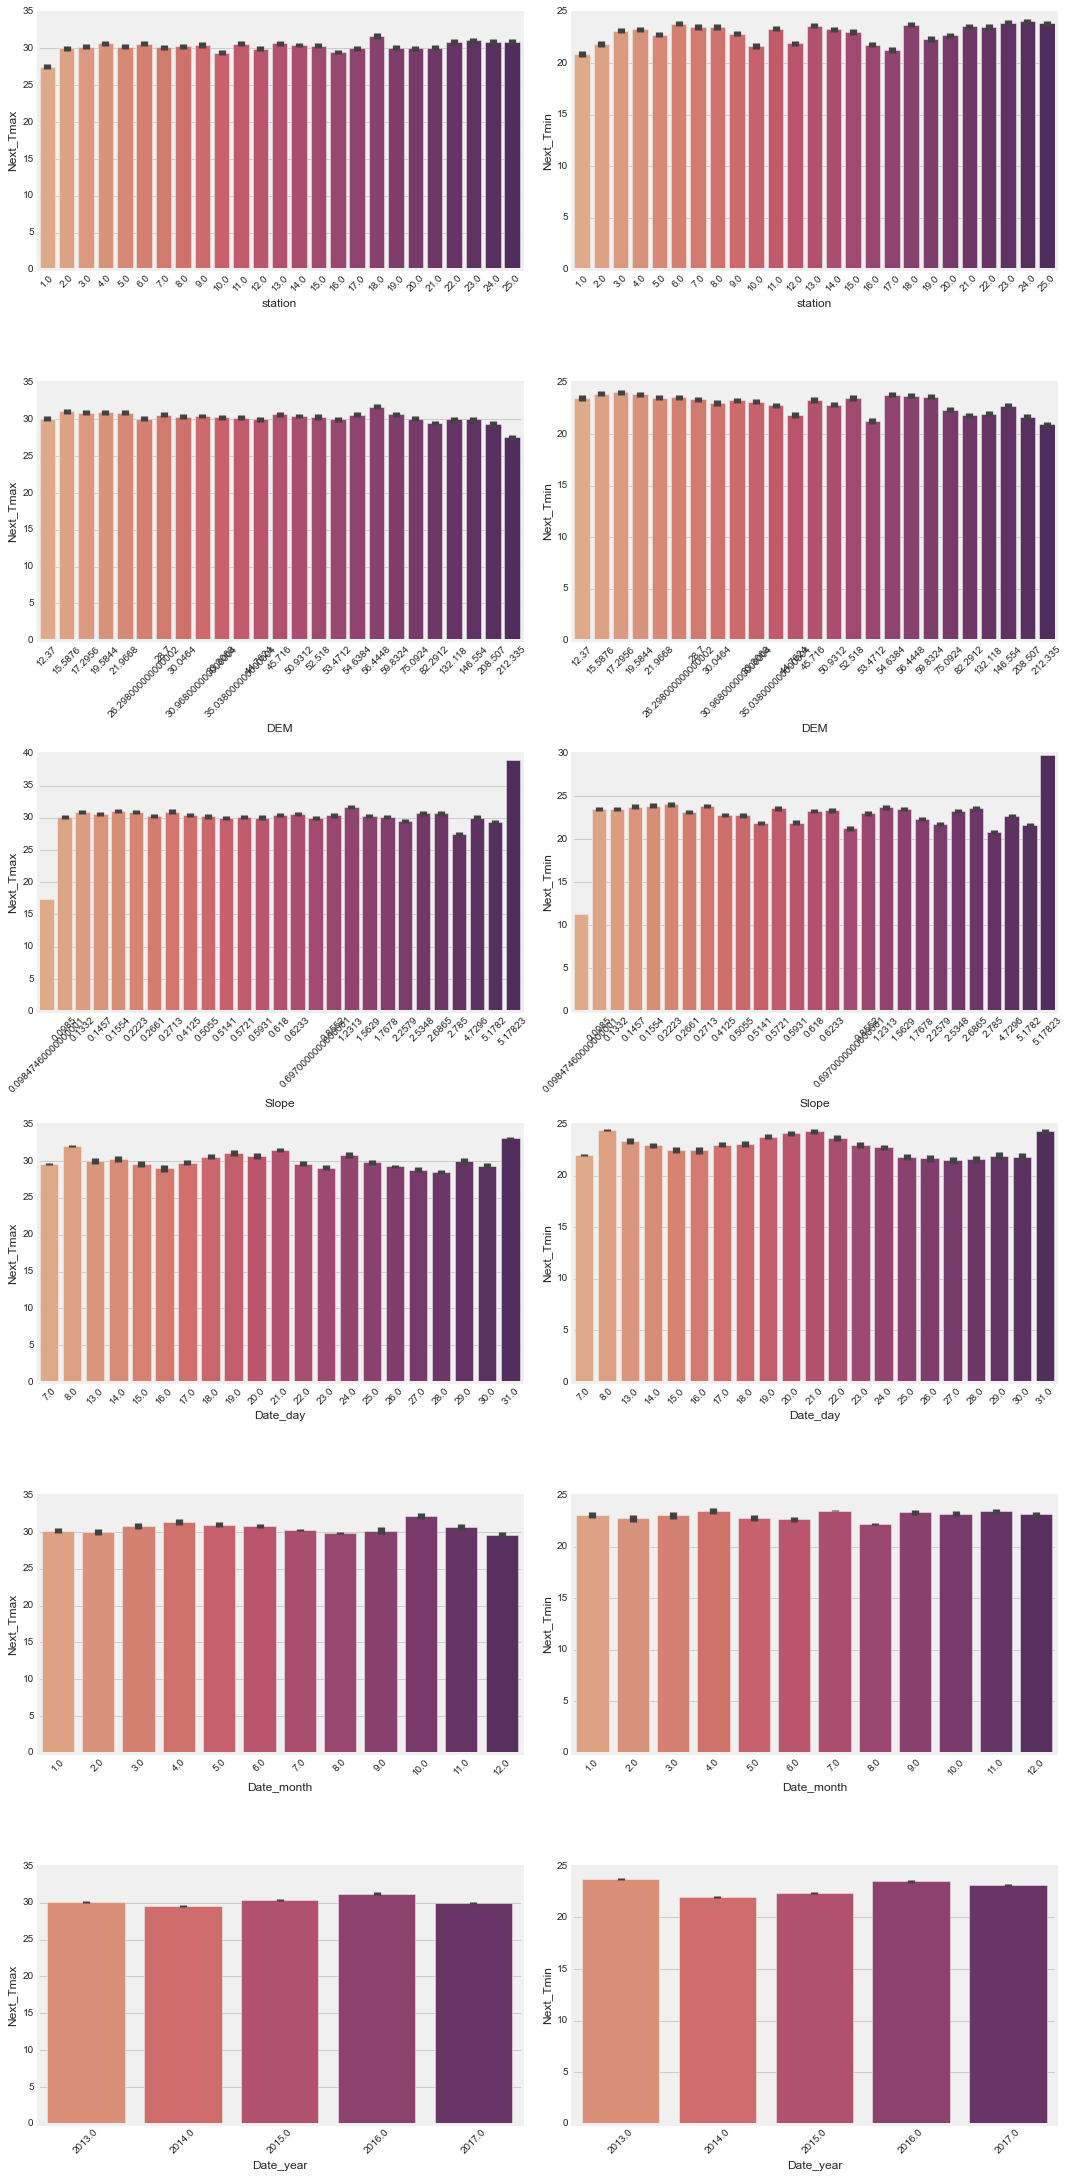

In [156]:
plt.figure(figsize=(15,40))
c=1
for i in categorical_col[3:]:
    for j in ['Next_Tmax','Next_Tmin']:
        plt.subplot(8,2,c)
        c=c+1
        sb.barplot(train[i],train[j],palette='flare')
        plt.xticks(rotation=45)
plt.tight_layout()
   

##### OBSERVATIONS:
    - Year , Dem,station  doesnot seem to have much influence on Target Variable.
    - 10th month seem to have highest average mean maxT Tempreture.
    - month 8 has lowest average mean minT tempreture.
    - 31 of the mnoth seems to have Highest mean of max_Temp and min_temp.
    - lowest value of slope has lowest mean avg of maxT and minT, Highest Slope Value has Highest AVerage MaxT and MinT
    

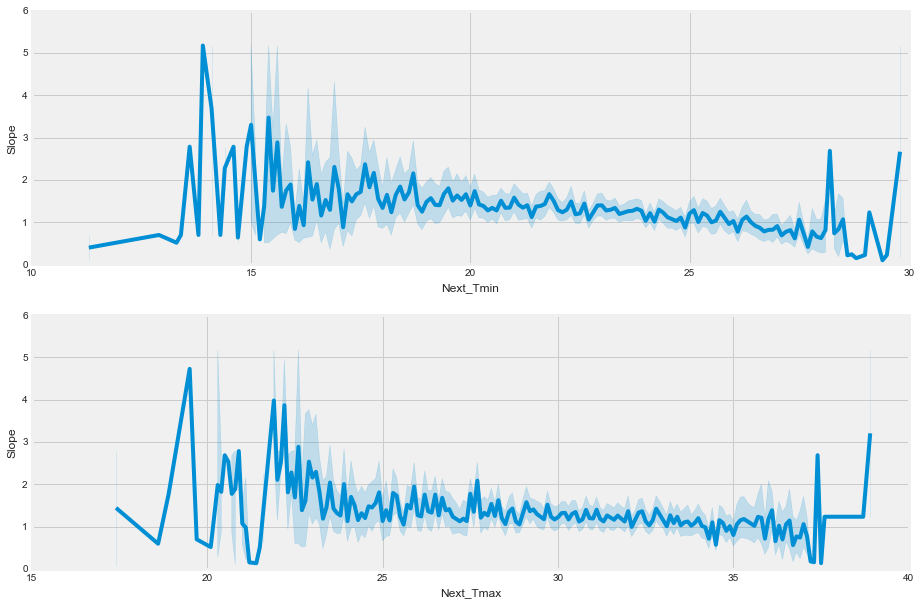

In [165]:
# Distribution of Data of Property ARea and w.r.t to loan_Status.
fig,ax =plt.subplots(2,1, figsize=(14,10))

sb.lineplot(train['Slope'],train['Next_Tmax'], ax=ax[1],palette='Set2')
sb.lineplot(train['Slope'],train['Next_Tmin'], ax=ax[0],palette='Set2')
fig.show()

#sb.violinplot(x_over['Married'],y_over,)

#### OBSERVATIONS:
        Next_Temp MAx / Min is Highest for higher value of Slope. Next T max is lowest for lowest value of slope.
       

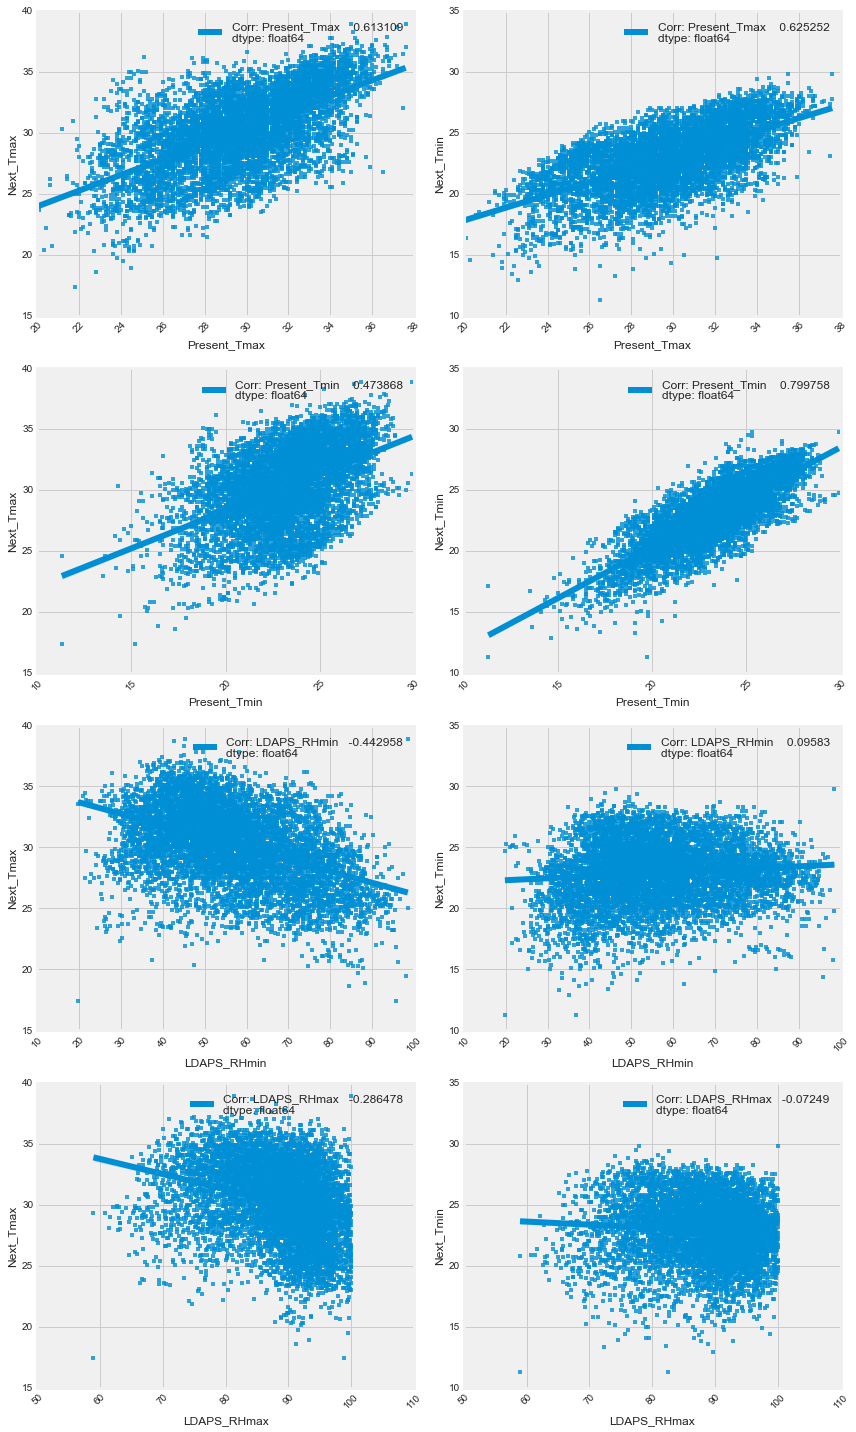

In [184]:
plt.figure(figsize=(12,20))
c=1
for i in columns[:4]:
    for j in ['Next_Tmax','Next_Tmin']:
        plt.subplot(4,2,c)
        c=c+1
        sb.regplot(x=i,y=j,data=train,marker='+')
        plt.legend( ['Corr: '+str(pd.DataFrame(train[i]).corrwith(train[j]) )] )
        plt.xticks(rotation=45)
plt.tight_layout()
   

### OBSERVATION:
    - PResent Tmax, Tmin show positive corelation witrh next TMax , Tmin
    - LDAPS RH MAx, min has scattered values all over for next tmax, Min.
    - LDAPS RH min has negative corelation with next TMAx
   

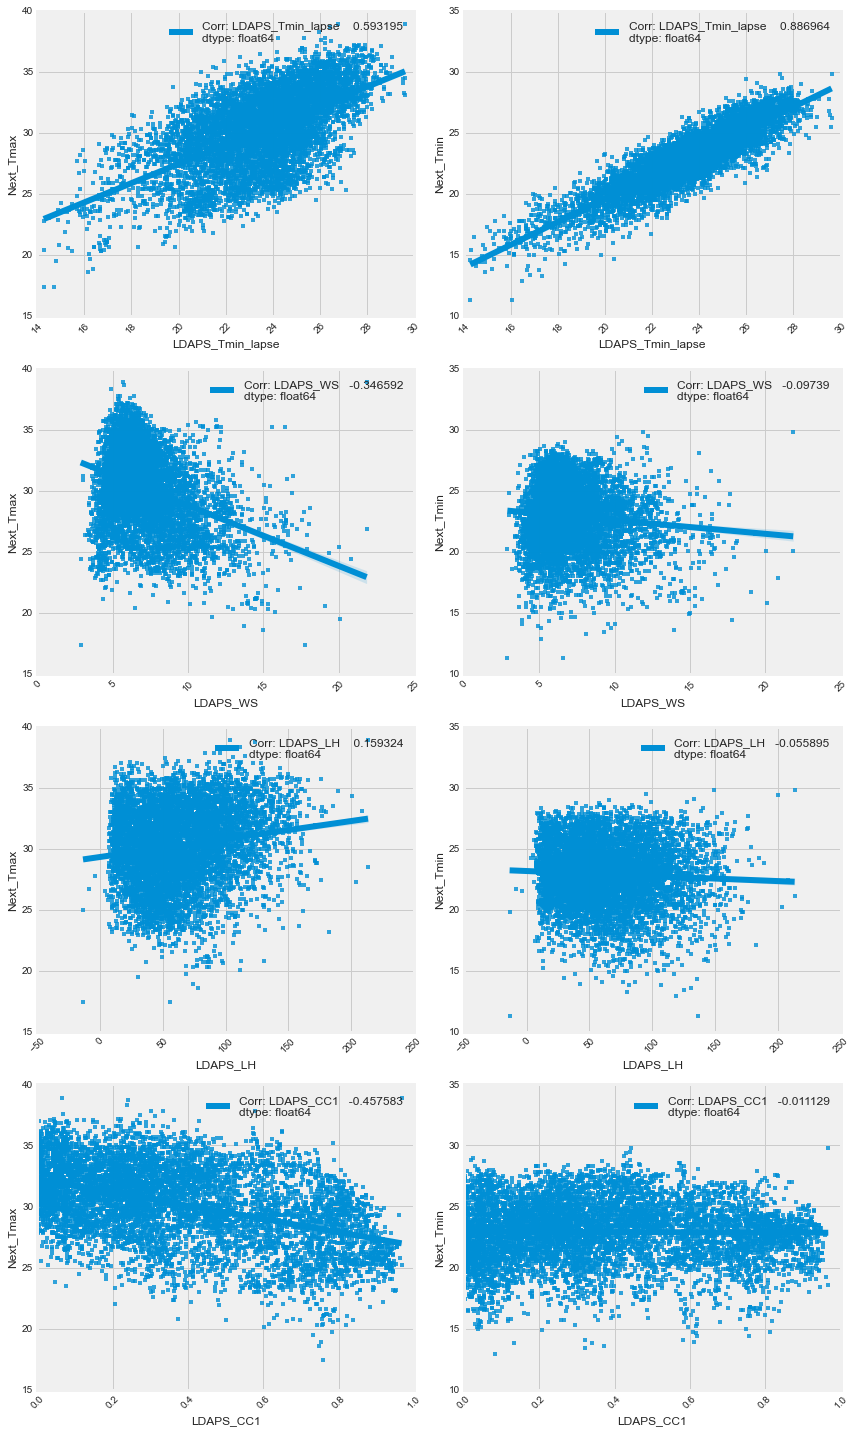

In [186]:
plt.figure(figsize=(12,20))
c=1
for i in columns[5:9]:
    for j in ['Next_Tmax','Next_Tmin']:
        plt.subplot(4,2,c)
        c=c+1
        sb.regplot(x=i,y=j,data=train,marker='+')
        plt.legend( ['Corr: '+str(pd.DataFrame(train[i]).corrwith(train[j]) )] )
        plt.xticks(rotation=45)
plt.tight_layout()
   

#### OBSERVATIONS:
    - LDAPS_WS withNext_Tmax moderate negative correlation.
    - Ldaps_tmin_lapse positive strong correlation with next_tmin and next_tmax.
    -  LDAPS LH, Ldaps_CC1  has no correlation qith Target Variables.

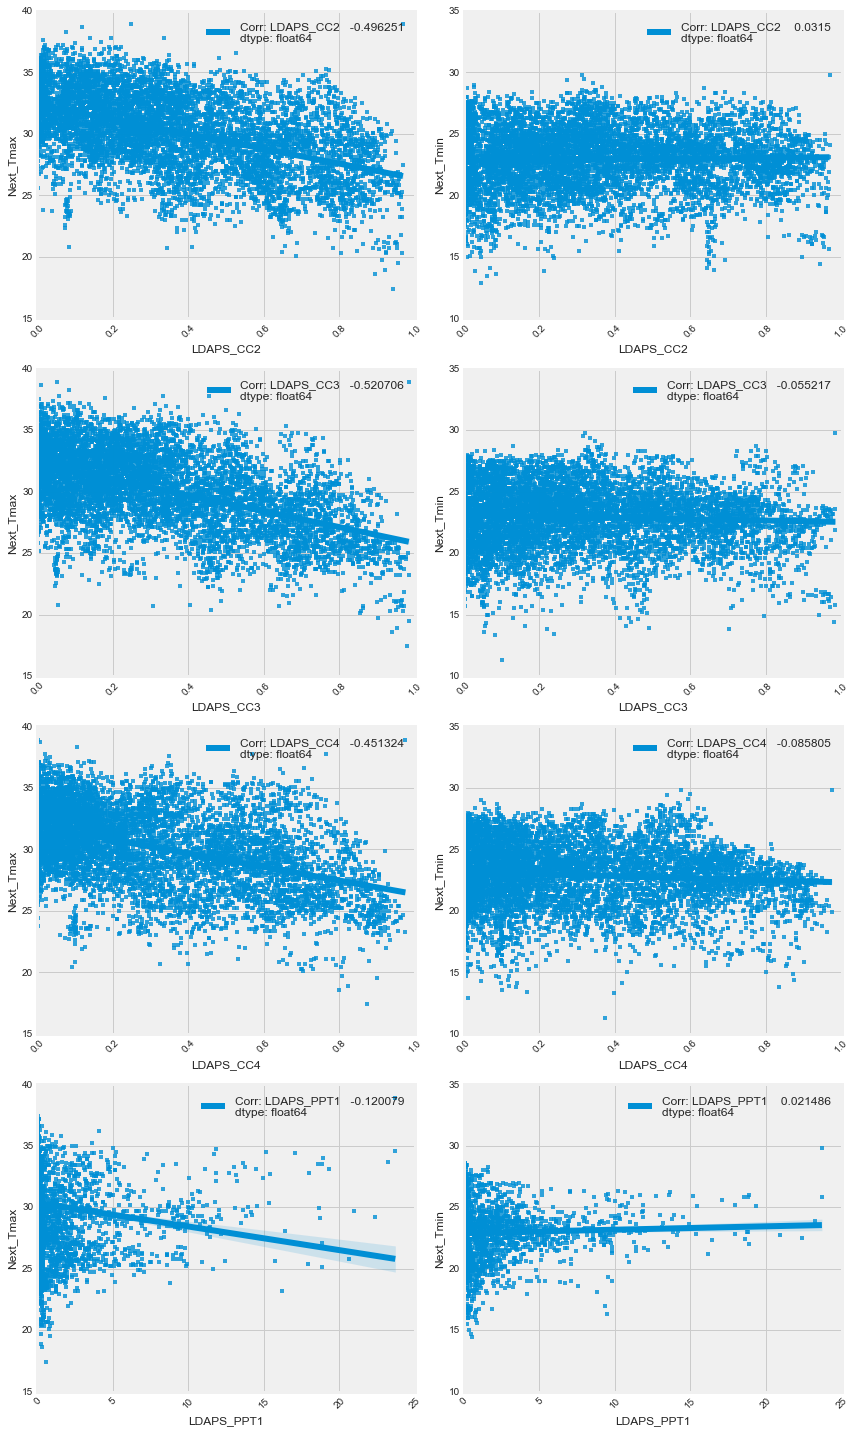

In [187]:
plt.figure(figsize=(12,20))
c=1
for i in columns[9:13]:
    for j in ['Next_Tmax','Next_Tmin']:
        plt.subplot(4,2,c)
        c=c+1
        sb.regplot(x=i,y=j,data=train,marker='+')
        plt.legend( ['Corr: '+str(pd.DataFrame(train[i]).corrwith(train[j]) )] )
        plt.xticks(rotation=45)
plt.tight_layout()
   

#### OBSERVATIONS:
    - LDAPS ppt1 has no corr with next Tmax and NExt Tmin.
    - Ldaps CC4 has moderate negative corr with next Tmax and No corr with Next Tmin.
    - CC3,cc2 has moderate corr with Next Tmax. not with Tmin (no corr).
    - 

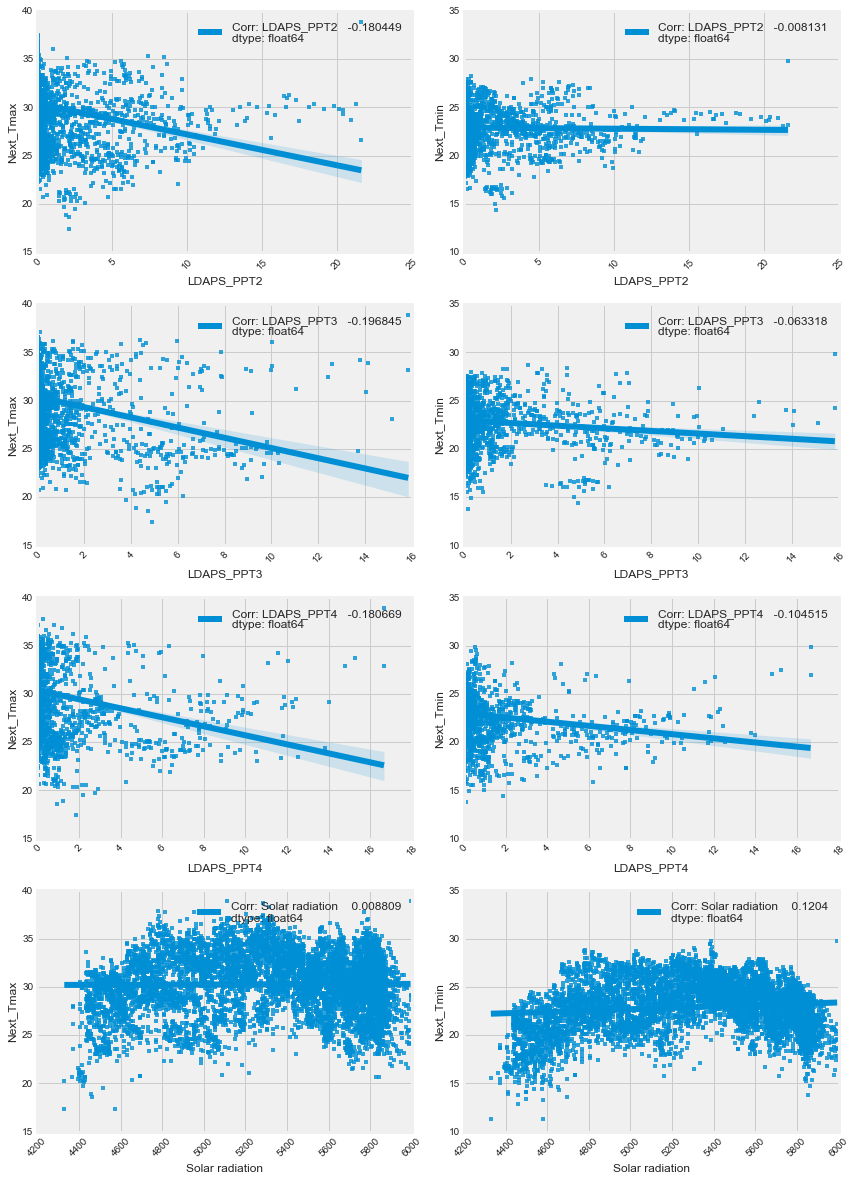

In [188]:
plt.figure(figsize=(12,20))
c=1
for i in columns[13:]:
    for j in ['Next_Tmax','Next_Tmin']:
        plt.subplot(5,2,c)
        c=c+1
        sb.regplot(x=i,y=j,data=train,marker='+')
        plt.legend( ['Corr: '+str(pd.DataFrame(train[i]).corrwith(train[j]) )] )
        plt.xticks(rotation=45)
plt.tight_layout()
   

#### OBSERVATIONS:
    - Solar raidiation has no corr with Next Tmax and Max Tmin,
    - PPt4, ppt3, ppt 2 ldaps have moderate neg corr with max, and no corr with min T Next.
    - 

#### Multi Variante Analysis

<AxesSubplot:>

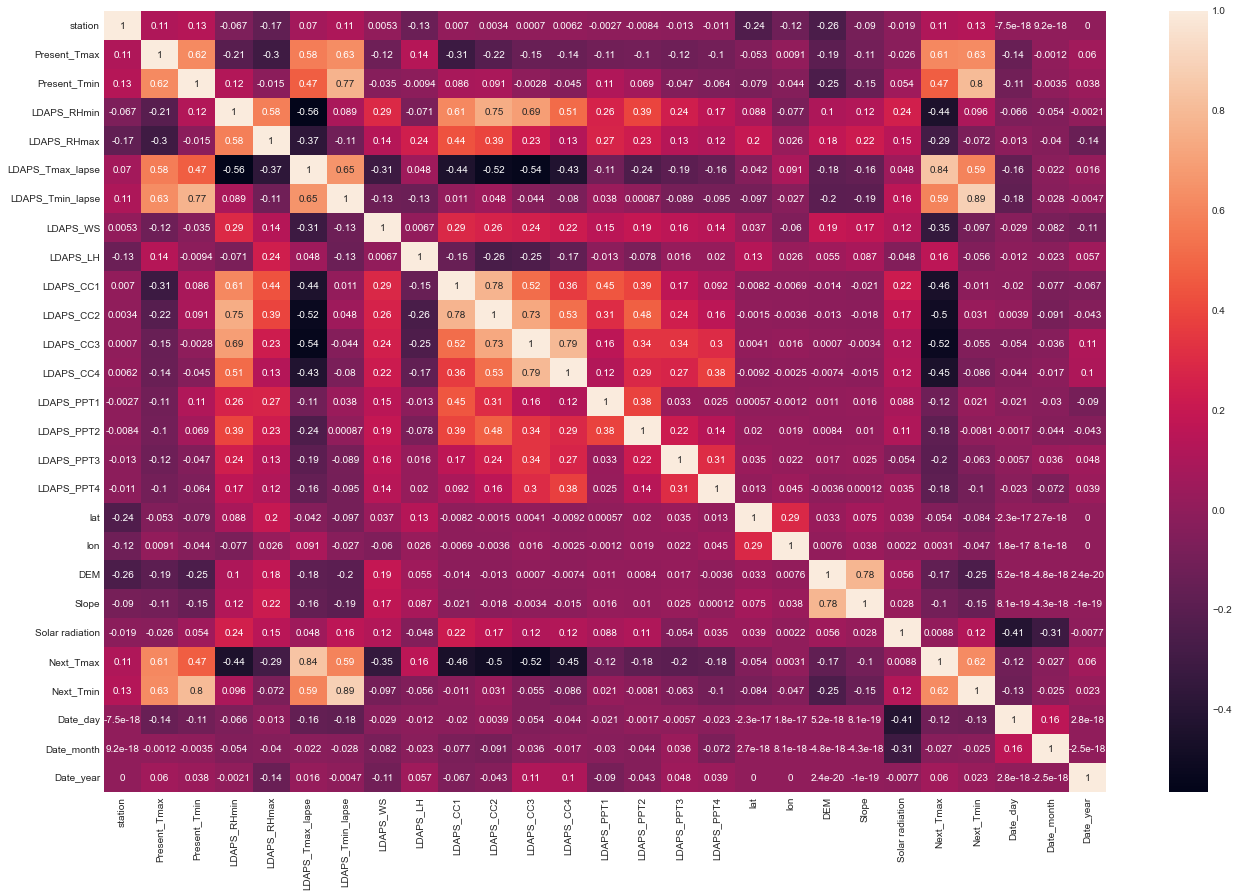

In [194]:
plt.figure(figsize = (20,14))
sb.heatmap(train.corr(),annot=True)

####  Observations:
    - Multicollinearity Observed between features.
        - Slope and DEM
        - LDAPS_Tmin_lapse with LDAPS_Tmin_lapse
        - AS 2 Target Variable arae present and both are correlated , we  can use one to predict other target.
        - Ldaps CC1,CC2,CC3,CC4 with LDAPS_Rmin and moderate with Rmax.
        - LDAPS CC1,cc2,cc3,cc4 are correlated within each other
        - 
    -  Target Varaible Next_Tmin and Next Tmax are dependant on each other as they have high correlation.

#####  AS Targets are dependants on each to each other , we can creacte 2 different models where 1 target can be input to ther.
##### Or Develop a multi output Regressor, we can try both approaches and see which  model gives best results.

##### MULTI COLLINEARITY CHECK

In [ ]:
train['LDAPS_CC1']

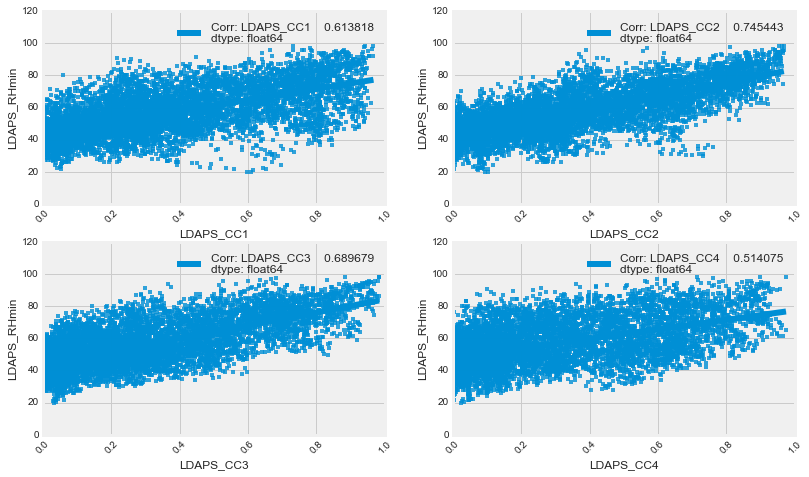

In [197]:
    plt.figure(figsize=(12,20))
    c=1
    for i in ['LDAPS_CC1','LDAPS_CC2','LDAPS_CC3','LDAPS_CC4']:
        plt.subplot(5,2,c)
        c=c+1
        sb.regplot(x=i,y='LDAPS_RHmin',data=train,marker='+')
        plt.legend( ['Corr: '+str(pd.DataFrame(train[i]).corrwith(train['LDAPS_RHmin']) )] )
        plt.xticks(rotation=45)

####  LINear Correlation between LDAPS CC1, CC2,CC3,CC4 with LDAPS _ RHmin

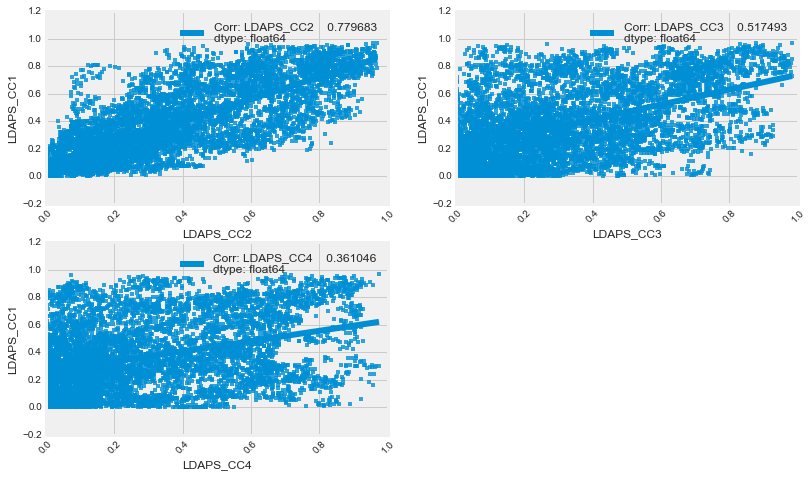

In [198]:
    plt.figure(figsize=(12,20))
    c=1
    for i in ['LDAPS_CC2','LDAPS_CC3','LDAPS_CC4']:
        plt.subplot(5,2,c)
        c=c+1
        sb.regplot(x=i,y='LDAPS_CC1',data=train,marker='+')
        plt.legend( ['Corr: '+str(pd.DataFrame(train[i]).corrwith(train['LDAPS_CC1']) )] )
        plt.xticks(rotation=45)

####  LINear Correlation between LDAPS CC1 with CC2,CC3,CC4 

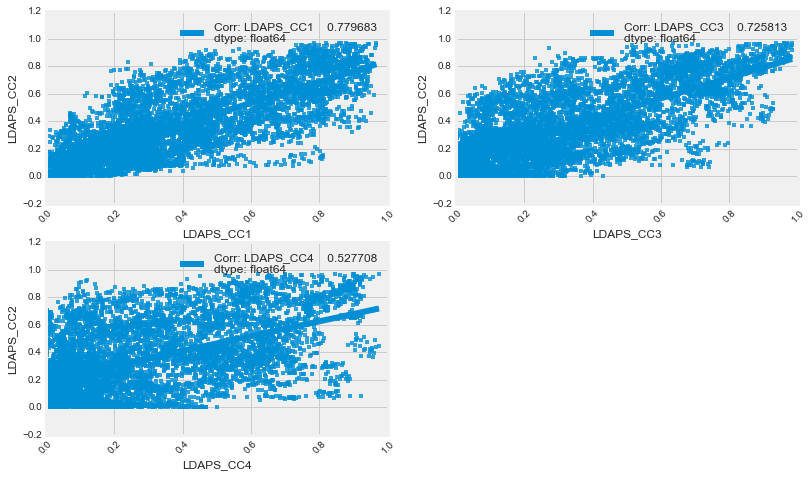

In [199]:
    plt.figure(figsize=(12,20))
    c=1
    for i in ['LDAPS_CC1','LDAPS_CC3','LDAPS_CC4']:
        plt.subplot(5,2,c)
        c=c+1
        sb.regplot(x=i,y='LDAPS_CC2',data=train,marker='+')
        plt.legend( ['Corr: '+str(pd.DataFrame(train[i]).corrwith(train['LDAPS_CC2']) )] )
        plt.xticks(rotation=45)

####  LINear Correlation between LDAPS CC2 with CC1,CC3,CC4 

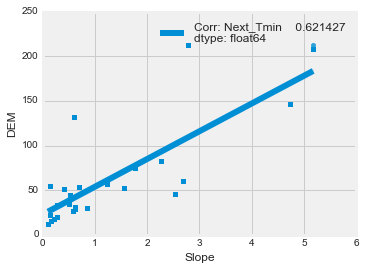

In [218]:
plt.figure(figsize=(5,4))
sb.regplot(train['Slope'],train['DEM'])
plt.legend( ['Corr: '+str(pd.DataFrame(train['Next_Tmin']).corrwith(train['Next_Tmax']) )] )

##### SLOPE AND DEM HAS A LINEAR RELATIONSHIP 

#### TARGET ARE DEPENDANT

<AxesSubplot:xlabel='Next_Tmax', ylabel='Next_Tmin'>

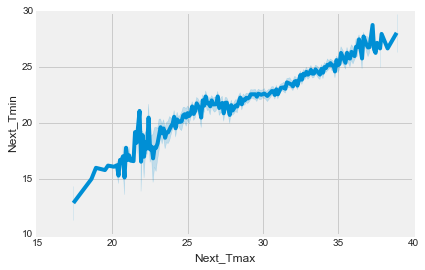

In [200]:
sb.lineplot(train['Next_Tmax'],train['Next_Tmin'])

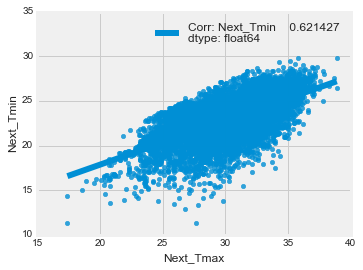

In [203]:
plt.figure(figsize=(5,4))
sb.regplot(train['Next_Tmax'],train['Next_Tmin'])
plt.legend( ['Corr: '+str(pd.DataFrame(train['Next_Tmin']).corrwith(train['Next_Tmax']) )] )

#### Strong Correlation between Next_Tmax and Next_TMin

In [208]:
train[train.isna().any(axis=1)][:20]

,station,Date,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Date_day,Date_month,Date_year
225,1.0,20130907,NaN,NaN,70.051193,99.668961,27.872808,22.907420,11.017837,44.002020,...,37.6046,126.991,212.3350,2.7850,5925.883789,23.4,22.0,7.0,9.0,2013.0
271,22.0,20131007,NaN,NaN,72.196007,95.168205,28.097980,24.510159,8.374849,38.782242,...,37.5102,127.086,21.9668,0.1332,5772.487305,26.1,24.1,7.0,10.0,2013.0
300,1.0,20131207,NaN,NaN,95.027298,99.209839,24.078120,21.866817,8.543768,9.371270,...,37.6046,126.991,212.3350,2.7850,5893.265625,23.2,20.5,7.0,12.0,2013.0
450,1.0,20130718,NaN,NaN,60.891193,94.747780,29.195536,23.236973,10.881031,79.349271,...,37.6046,126.991,212.3350,2.7850,5812.293457,27.6,21.8,18.0,7.0,2013.0
464,15.0,20130718,NaN,NaN,52.795406,83.902847,31.480089,25.607262,8.995135,26.022306,...,37.5507,126.937,30.0464,0.8552,5681.875000,30.7,23.4,18.0,7.0,2013.0
627,3.0,20130725,NaN,NaN,43.809799,86.972778,32.293370,24.725570,6.998412,12.913524,...,37.5776,127.058,33.3068,0.2661,5553.048828,31.3,23.3,25.0,7.0,2013.0
831,7.0,20130208,29.6,25.8,76.202255,94.058517,28.842727,26.442801,7.980686,87.715882,...,37.5776,126.838,12.3700,0.0985,5357.705566,NaN,NaN,8.0,2.0,2013.0
856,7.0,20130308,NaN,NaN,69.476059,93.672600,30.491629,25.081388,6.282423,124.191446,...,37.5776,126.838,12.3700,0.0985,5332.515625,NaN,NaN,8.0,3.0,2013.0
881,7.0,20130408,NaN,NaN,75.457825,92.582436,30.168241,26.228888,6.921643,99.902727,...,37.5776,126.838,12.3700,0.0985,5306.734863,30.7,25.8,8.0,4.0,2013.0
913,14.0,20130508,NaN,NaN,76.040504,94.029243,30.563506,26.743236,7.776664,32.352678,...,37.4967,126.927,30.9680,0.6180,5287.500977,28.8,22.2,8.0,5.0,2013.0


In [210]:
len(train[train.isna().any(axis=1)])

164

#### More than one column vlaue is Nan is any row containg Nan Values, filling mssing vlaues might give rise to inconsistent data or might effect model performance. 
### Better to drop all NAN values as more than 1 column feature is null. total 164 data giving rise to 2.2% data loss.

In [219]:
train.drop('Date',axis=1,inplace=True)


KeyError: "['Date'] not found in axis"

In [221]:
train = train.dropna()

In [222]:
train.shape

(7588, 27)

###  DATA CLEANING
    - Oultier detection and Treatment
    - Skewness check and tratment
    - Scaling the Data

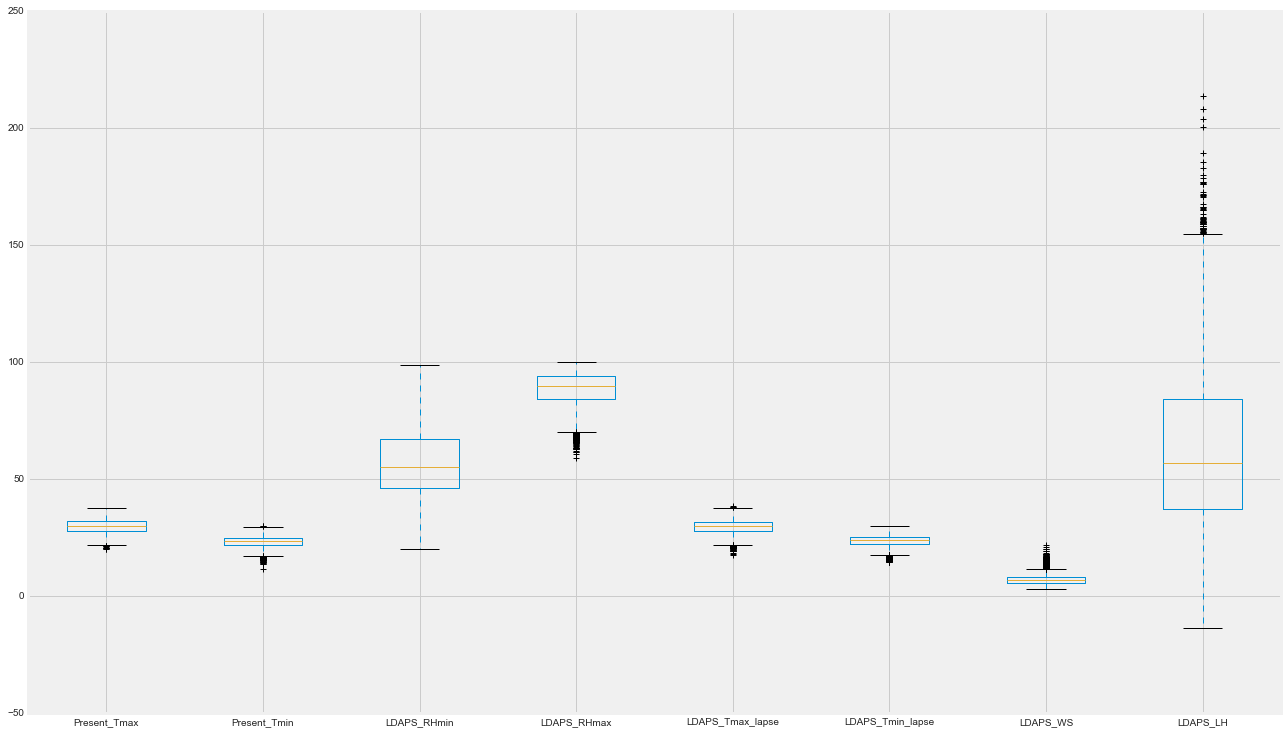

In [240]:
train[columns].iloc[:,:8].boxplot(figsize=[20,15])
plt.subplots_adjust(bottom=.25)
plt.show()

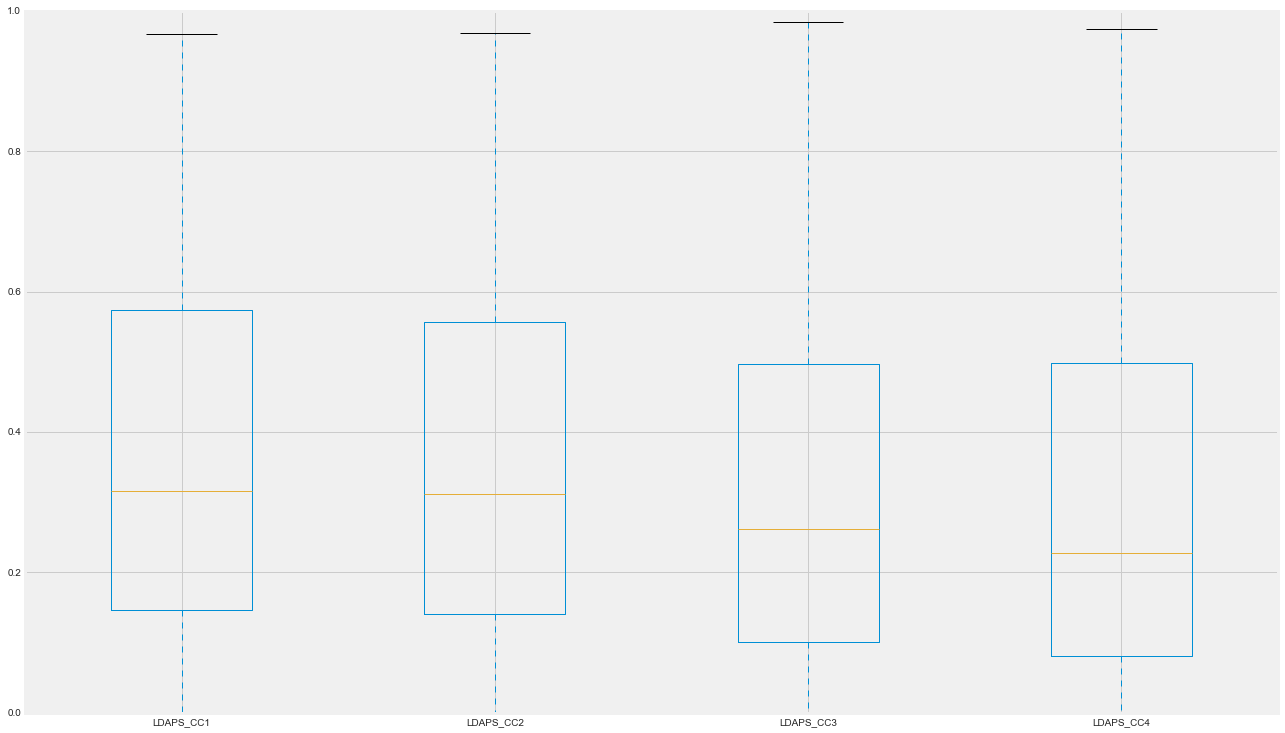

In [244]:
train[columns].iloc[:,8:12].boxplot(figsize=[20,15])
plt.subplots_adjust(bottom=.25)
plt.show()

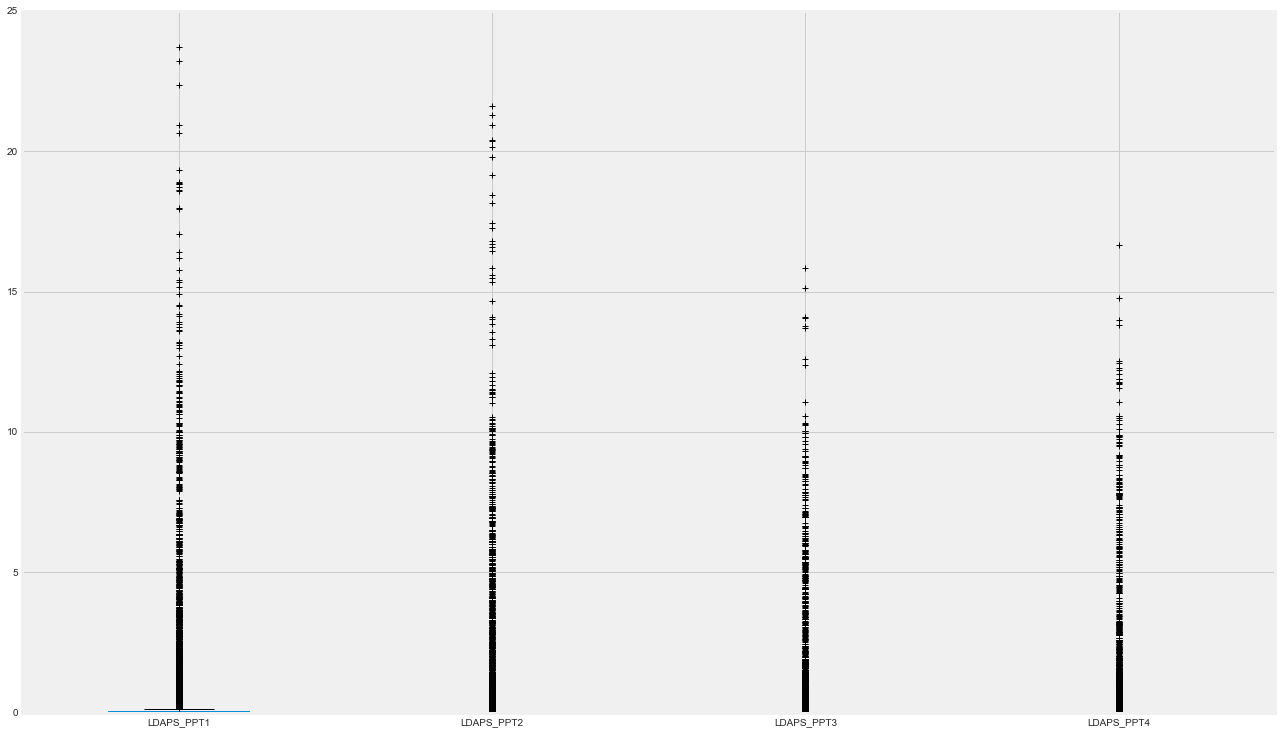

In [246]:
train[columns].iloc[:,12:-1].boxplot(figsize=[20,15])
plt.subplots_adjust(bottom=.25)
plt.show()

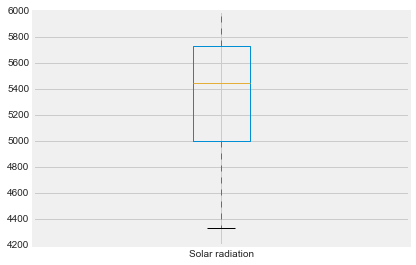

In [248]:
train[columns].iloc[:,-1:].boxplot(figsize=[6,5])
plt.subplots_adjust(bottom=.25)
plt.show()

In [ ]:
#### OUTLIER TREATMENT WITH ZSCORE

In [589]:
from scipy.stats import zscore

In [251]:
zscores = np.abs(zscore(train))

In [253]:
len(np.where(zscores>3)[0])

1117

#### OBSERVATIONS
    Outlier Removal would result is high data loss as 2.2 % data loss is already done. So we would try some other approach  like power Transformer to treat skewness for LDAPS_PPT!, PPT2, PPT3, PPT4 as correlation with target variable is very low .

In [254]:
train.corr()

,station,Present_Tmax,Present_Tmin,LDAPS_RHmin,LDAPS_RHmax,LDAPS_Tmax_lapse,LDAPS_Tmin_lapse,LDAPS_WS,LDAPS_LH,LDAPS_CC1,...,lat,lon,DEM,Slope,Solar radiation,Next_Tmax,Next_Tmin,Date_day,Date_month,Date_year
station,1.000000,0.113301,0.133282,-0.067846,-0.169351,0.069856,0.105277,0.005822,-0.132129,0.006539,...,-0.239118,-0.118845,-0.256706,-0.091721,-0.021194,0.107747,0.128184,-0.000996,0.001211,0.001474
Present_Tmax,0.113301,1.000000,0.615208,-0.209059,-0.306943,0.573777,0.628705,-0.125952,0.134246,-0.316333,...,-0.054134,0.007695,-0.189439,-0.107079,-0.022114,0.610357,0.621048,-0.154366,-0.003266,0.056002
Present_Tmin,0.133282,0.615208,1.000000,0.122200,-0.018576,0.467904,0.772061,-0.038779,-0.012817,0.084348,...,-0.081417,-0.045174,-0.254084,-0.148423,0.059765,0.463523,0.796975,-0.115693,-0.010210,0.037457
LDAPS_RHmin,-0.067846,-0.209059,0.122200,1.000000,0.578358,-0.569580,0.085237,0.289422,-0.072195,0.612831,...,0.085027,-0.077590,0.100684,0.122454,0.242168,-0.446824,0.093249,-0.063464,-0.053499,-0.002147
LDAPS_RHmax,-0.169351,-0.306943,-0.018576,0.578358,1.000000,-0.377293,-0.118965,0.131269,0.238986,0.435937,...,0.194820,0.025563,0.176557,0.219436,0.146622,-0.289788,-0.076415,-0.012226,-0.039424,-0.144286
LDAPS_Tmax_lapse,0.069856,0.573777,0.467904,-0.569580,-0.377293,1.000000,0.653425,-0.316011,0.043663,-0.440878,...,-0.044052,0.091568,-0.181433,-0.163891,0.047414,0.835729,0.589963,-0.161320,-0.022279,0.020308
LDAPS_Tmin_lapse,0.105277,0.628705,0.772061,0.085237,-0.118965,0.653425,1.000000,-0.134652,-0.139675,0.008714,...,-0.099452,-0.024703,-0.198396,-0.187864,0.157763,0.592119,0.886513,-0.176772,-0.027050,-0.000564
LDAPS_WS,0.005822,-0.125952,-0.038779,0.289422,0.131269,-0.316011,-0.134652,1.000000,0.004427,0.285349,...,0.033025,-0.063009,0.188540,0.169223,0.120630,-0.351107,-0.102021,-0.028312,-0.082267,-0.114114
LDAPS_LH,-0.132129,0.134246,-0.012817,-0.072195,0.238986,0.043663,-0.139675,0.004427,1.000000,-0.148314,...,0.133309,0.024476,0.056362,0.087517,-0.044956,0.156779,-0.060392,-0.010504,-0.024944,0.055898
LDAPS_CC1,0.006539,-0.316333,0.084348,0.612831,0.435937,-0.440878,0.008714,0.285349,-0.148314,1.000000,...,-0.010268,-0.007962,-0.017378,-0.023893,0.218285,-0.459705,-0.012877,-0.018974,-0.076819,-0.066233


### SCALING THE DATA


#### AS Skewness is present due to oultliers, we can perform Power Transformer to whole Data Set.

In [335]:
from sklearn.preprocessing import PowerTransformer

In [336]:
transformer = PowerTransformer()

In [538]:
y_max = train['Next_Tmax']
y_min = train['Next_Tmin']
X_max = train.drop('Next_Tmax',axis=1 )
X_min = train.drop('Next_Tmin',axis=1 )
x = train.drop(['Next_Tmax','Next_Tmin'],axis=1 )
y = train[['Next_Tmax','Next_Tmin']]

In [539]:
features =  transformer.fit_transform(x)
features_1_1 = transformer.fit_transform(X_max)
features_2_1 = transformer.fit_transform(X_min)

In [540]:
x_transformed = pd.DataFrame(features, columns = x.columns)
x_transformed_maxT = pd.DataFrame(features_1_1, columns = X_max.columns)
x_transformed_minT = pd.DataFrame(features_2_1, columns = X_min.columns)

In [411]:
from  sklearn.decomposition import PCA

In [541]:
pca = PCA()
pca.fit(x_transformed,y_max)

PCA()

In [542]:
x_max1.shape

(7588, 26)

<BarContainer object of 25 artists>

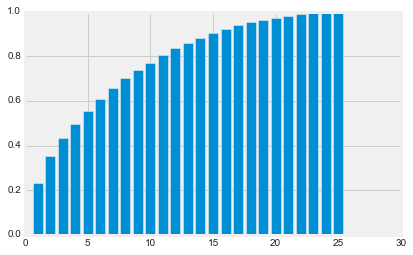

In [544]:
plt.bar(range(1,26),np.cumsum(pca.explained_variance_ratio_))

<BarContainer object of 25 artists>

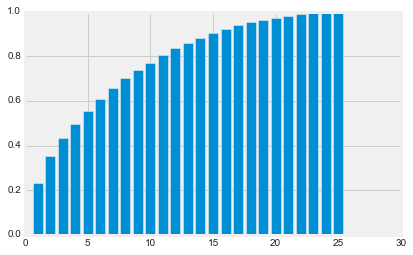

In [545]:
pca = PCA()
pca.fit(x_transformed,y_min)

plt.bar(range(1,26),np.cumsum(pca.explained_variance_ratio_))

#### AS WE can see 21 elements are giving more than 90% information about the Target Variable.

In [383]:
x_transformed_minT.skew()

station            -0.206291
Present_Tmax       -0.036516
Present_Tmin       -0.014363
LDAPS_RHmin        -0.018008
LDAPS_RHmax        -0.120174
LDAPS_Tmax_lapse   -0.012155
LDAPS_Tmin_lapse   -0.021647
LDAPS_WS            0.005937
LDAPS_LH            0.028141
LDAPS_CC1           0.048221
LDAPS_CC2           0.047595
LDAPS_CC3           0.091156
LDAPS_CC4           0.129974
LDAPS_PPT1          1.451770
LDAPS_PPT2          1.637689
LDAPS_PPT3          1.814526
LDAPS_PPT4          2.041426
lat                 0.068584
lon                -0.202301
DEM                 0.039591
Slope               0.233968
Solar radiation    -0.182349
Next_Tmax          -0.039960
Date_day           -0.041461
Date_month          0.043710
Date_year           0.409648
dtype: float64

### DATA MODELLING

        -- MODELLING 2 Different Models for MAxT temp and minT temp
        -- using MinT to predict maxT and using MAxT as feature to predict MinT as MinT and MaxT (TArget Variables are dpeendant on Each Other)
        
        - Random State function and model prediction is common and unified for any model and any dataset and Target.

In [546]:
#function to find best random state for any model

def random_state_func(model,x,y):
    
    randomstate = 0
    max_score = 0
    
    for i in range(1,50):
        x_train,x_test,y_train,y_test = train_test_split(x, y,test_size=.30,random_state=i)
        model.fit(x_train,y_train)
        pred = model.predict(x_test)
        score = r2_score(y_test,pred)    
        if(score>max_score):
            max_score = score
            randomstate  = i
            
    return(randomstate,max_score)

In [548]:
cv_scores = []
r2_scores = []
rmse = []


In [489]:
# Method to for algorithm prediction for any model.

def model_predict(model,randomstate,x,y):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.33,random_state=randomstate)
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    cv_score = np.mean(cross_val_score(model,x,y,cv=10,scoring='r2'))
     
    print('------------',model,'--------------')
    print(' R2 Score              : ', r2_score(y_test,predictions))
    print('Cross Validation Score : ',cv_score)
    print('Root Mean Squared Error :',np.sqrt(mean_squared_error(y_test,predictions)))
    print('Absolute Mean Square   :', mean_absolute_error(y_test,predictions))
    
    
  
    r2_scores.append(r2_score(y_test,predictions))
    cv_scores.append(cv_score)
    rmse.append(np.sqrt(mean_squared_error(y_test,predictions)))
    
    
    plt.figure(figsize=(6,5))
    
    sb.regplot(y_test,predictions,color='orange',)
    plt.xlabel('Y_True')
    plt.ylabel('Y_predicted')
    plt.show()    

### LINEAR REGRESSION

In [490]:
rs,score = random_state_func(LinearRegression(),x_max1,y_max)
print('Random State : ', rs , ' with r2 score :',score)
rs1,score1 = random_state_func(LinearRegression(),x_min1,y_min)
print('Random State : ', rs1 , ' with r2 score :',score1)

Random State :  43  with r2 score : 0.8151883255660207
Random State :  7  with r2 score : 0.8591665865718496


------------ LinearRegression() --------------
 R2 Score              :  0.8134046458373292
Cross Validation Score :  0.682730799086982
Root Mean Squared Error : 1.3783210955597256
Absolute Mean Square   : 1.0519501744500634


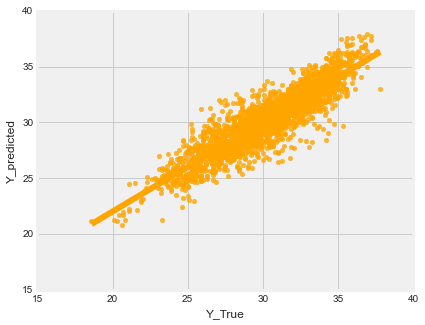

In [491]:
model_predict(LinearRegression(),rs,x_max1,y_max)

------------ LinearRegression() --------------
 R2 Score              :  0.8569078936842855
Cross Validation Score :  0.7641129296172918
Root Mean Squared Error : 0.9553074009674892
Absolute Mean Square   : 0.7489615622071736


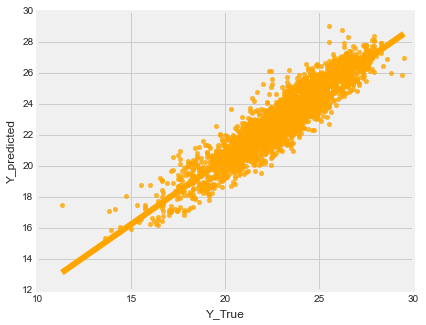

In [492]:
model_predict(LinearRegression(),rs1,x_min1,y_min)

### RIDGE

Random State :  43  with r2 score : 0.8151906649950503
Random State :  7  with r2 score : 0.8591642397609949


************** PREDICTIONS for NEXT DAY MAX TEMPRATURE ********************


------------ Ridge() --------------
 R2 Score              :  0.8134052674363678
Cross Validation Score :  0.6827511110431009
Root Mean Squared Error : 1.37831879977968
Absolute Mean Square   : 1.051923507570277


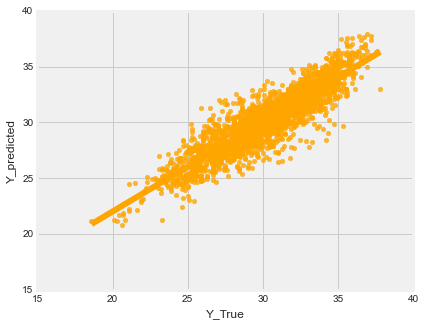


************** PREDICTIONS for NEXT DAY MIN TEMPRATURE ********************

------------ Ridge() --------------
 R2 Score              :  0.8569027720944735
Cross Validation Score :  0.7641265404607926
Root Mean Squared Error : 0.9553244971197465
Absolute Mean Square   : 0.7489778433870282


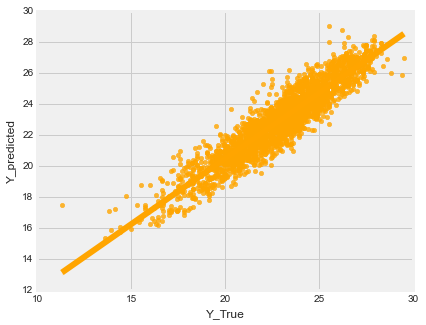

In [493]:
rs,score = random_state_func(Ridge(),x_max1,y_max)
print('Random State : ', rs , ' with r2 score :',score)
rs1,score1 = random_state_func(Ridge(),x_min1,y_min)
print('Random State : ', rs1 , ' with r2 score :',score1)

print('\n\n************** PREDICTIONS for NEXT DAY MAX TEMPRATURE ********************\n\n')

model_predict(Ridge(),rs,x_max1,y_max)
print('\n************** PREDICTIONS for NEXT DAY MIN TEMPRATURE ********************\n')
model_predict(Ridge(),rs1,x_min1,y_min)

### LASSO

Random State :  39  with r2 score : 0.602897199558411
Random State :  45  with r2 score : 0.6371304421379353


************** PREDICTIONS for NEXT DAY MAX TEMPRATURE ********************


------------ Lasso() --------------
 R2 Score              :  0.6016191699264186
Cross Validation Score :  0.46370080171321726
Root Mean Squared Error : 1.9340423755116176
Absolute Mean Square   : 1.5533433438871402


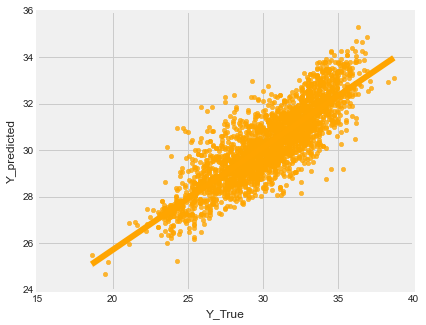


************** PREDICTIONS for NEXT DAY MIN TEMPRATURE ********************

------------ Lasso() --------------
 R2 Score              :  0.6389906951494185
Cross Validation Score :  0.5212464814330788
Root Mean Squared Error : 1.4595585899613457
Absolute Mean Square   : 1.1463830601545981


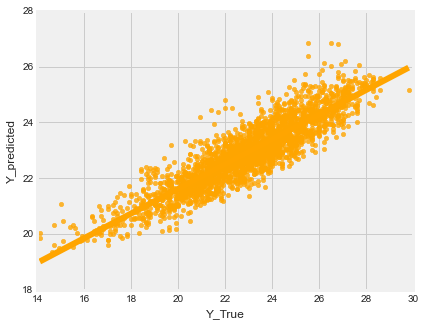

In [494]:
rs,score = random_state_func(Lasso(),x_max1,y_max)
print('Random State : ', rs , ' with r2 score :',score)
rs1,score1 = random_state_func(Lasso(),x_min1,y_min)
print('Random State : ', rs1 , ' with r2 score :',score1)

print('\n\n************** PREDICTIONS for NEXT DAY MAX TEMPRATURE ********************\n\n')

model_predict(Lasso(),rs,x_max1,y_max)
print('\n************** PREDICTIONS for NEXT DAY MIN TEMPRATURE ********************\n')
model_predict(Lasso(),rs1,x_min1,y_min)

### SVR

Random State :  30  with r2 score : 0.9139940949731917
Random State :  26  with r2 score : 0.9335371967684047


************** PREDICTIONS for NEXT DAY MAX TEMPRATURE ********************


------------ SVR() --------------
 R2 Score              :  0.9108264256564633
Cross Validation Score :  0.6829869333037422
Root Mean Squared Error : 0.938954836213199
Absolute Mean Square   : 0.703503386723741


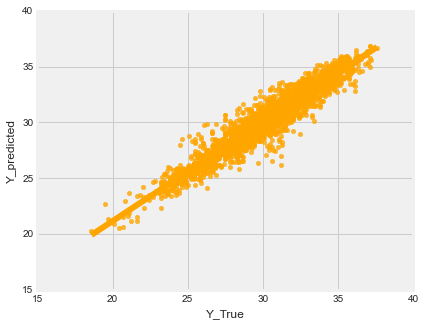


************** PREDICTIONS for NEXT DAY MIN TEMPRATURE ********************

------------ SVR() --------------
 R2 Score              :  0.9322878121780266
Cross Validation Score :  0.702796227415046
Root Mean Squared Error : 0.6408921648848694
Absolute Mean Square   : 0.49371842879787153


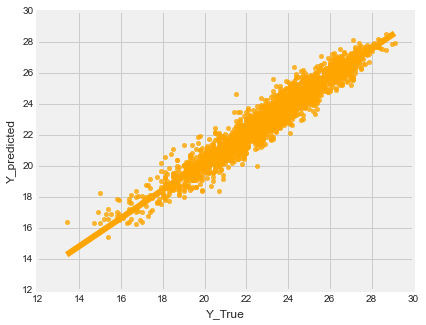

In [495]:
rs,score = random_state_func(SVR(),x_max1,y_max)
print('Random State : ', rs , ' with r2 score :',score)
rs1,score1 = random_state_func(SVR(),x_min1,y_min)
print('Random State : ', rs1 , ' with r2 score :',score1)

print('\n\n************** PREDICTIONS for NEXT DAY MAX TEMPRATURE ********************\n\n')

model_predict(SVR(),rs,x_max1,y_max)
print('\n************** PREDICTIONS for NEXT DAY MIN TEMPRATURE ********************\n')
model_predict(SVR(),rs1,x_min1,y_min)

#### AS you can clearly see, the cv score and r2 score difference is very high, suggesting that SVR is prone for overfitting.


### DECISION TREE 

Random State :  49  with r2 score : 0.822251650968038
Random State :  26  with r2 score : 0.8164894191621446


************** PREDICTIONS for NEXT DAY MAX TEMPRATURE ********************


------------ DecisionTreeRegressor() --------------
 R2 Score              :  0.8058547100481007
Cross Validation Score :  0.3730414198439885
Root Mean Squared Error : 1.3754868490306575
Absolute Mean Square   : 0.9831936127744509


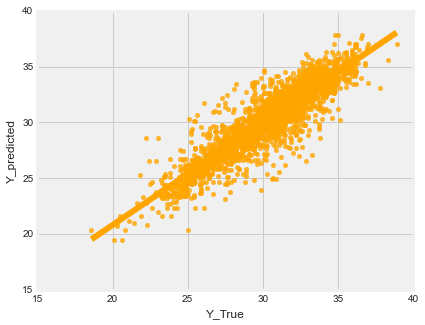


************** PREDICTIONS for NEXT DAY MIN TEMPRATURE ********************

------------ DecisionTreeRegressor() --------------
 R2 Score              :  0.8053924841762796
Cross Validation Score :  0.490467181383469
Root Mean Squared Error : 1.0865040349506632
Absolute Mean Square   : 0.8181636726546908


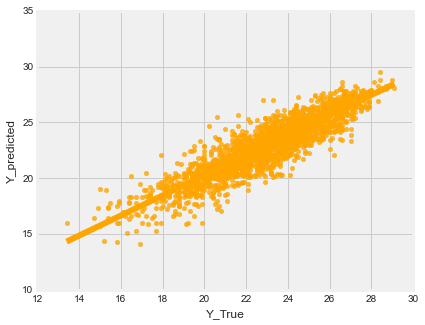

In [496]:
rs,score = random_state_func(DecisionTreeRegressor(),x_max1,y_max)
print('Random State : ', rs , ' with r2 score :',score)
rs1,score1 = random_state_func(DecisionTreeRegressor(),x_min1,y_min)
print('Random State : ', rs1 , ' with r2 score :',score1)

print('\n\n************** PREDICTIONS for NEXT DAY MAX TEMPRATURE ********************\n\n')

model_predict(DecisionTreeRegressor(),rs,x_max1,y_max)
print('\n************** PREDICTIONS for NEXT DAY MIN TEMPRATURE ********************\n')
model_predict(DecisionTreeRegressor(),rs1,x_min1,y_min)


##### DECISION TREE IS ALSO OVERFITTING AS ERROR (DIFFERENCE BETWEEN VALIDATION AND TRAINING SCORE IS HIGH)


### EMSEMBLE TECHNIQUES:

   #### RAMDOM FOREST

Random State :  30  with r2 score : 0.9212877020564543
Random State :  7  with r2 score : 0.9202896474399206


************** PREDICTIONS for NEXT DAY MAX TEMPRATURE ********************


------------ RandomForestRegressor() --------------
 R2 Score              :  0.9181150948843905
Cross Validation Score :  0.6793525628349076
Root Mean Squared Error : 0.899763850810616
Absolute Mean Square   : 0.6802495009980036


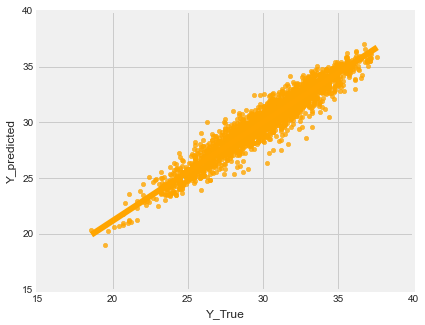


************** PREDICTIONS for NEXT DAY MIN TEMPRATURE ********************

------------ RandomForestRegressor() --------------
 R2 Score              :  0.914741845265275
Cross Validation Score :  0.7455670477480723
Root Mean Squared Error : 0.7374002295923118
Absolute Mean Square   : 0.561179241516966


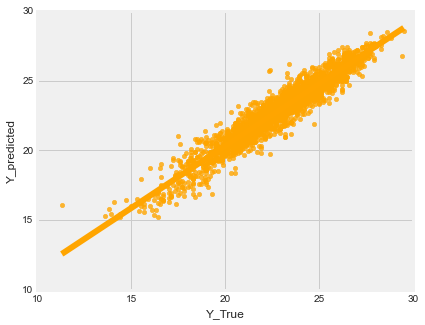

In [497]:
rs,score = random_state_func(RandomForestRegressor(),x_max1,y_max)
print('Random State : ', rs , ' with r2 score :',score)
rs1,score1 = random_state_func(RandomForestRegressor(),x_min1,y_min)
print('Random State : ', rs1 , ' with r2 score :',score1)

print('\n\n************** PREDICTIONS for NEXT DAY MAX TEMPRATURE ********************\n\n')

model_predict(RandomForestRegressor(),rs,x_max1,y_max)
print('\n************** PREDICTIONS for NEXT DAY MIN TEMPRATURE ********************\n')
model_predict(RandomForestRegressor(),rs1,x_min1,y_min)

Random State :  24  with r2 score : 0.9362586574249302
Random State :  24  with r2 score : 0.9458074153234407


************** PREDICTIONS for NEXT DAY MAX TEMPRATURE ********************


------------ XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) --------------
 R2 Score              :  0.9340702574373511
Cross Validation Score :  0.6581646411010641
Root Mean Squared Error : 0.7917095762948974
Absolute Mean Square   : 0.6064318476084939


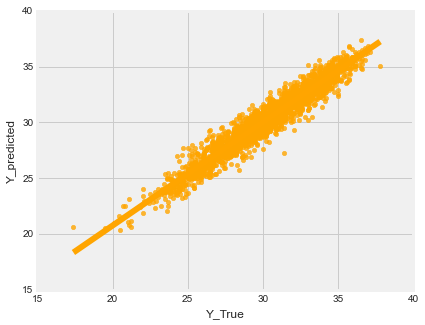


************** PREDICTIONS for NEXT DAY MIN TEMPRATURE ********************

------------ XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=8, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None) --------------
 R2 Score              :  0.942692446281445
Cross Validation Score :  0.7258531285620446
Root Mean Squared Error : 0.6085428095907984
Absolute Mean Square   : 0.45912493859936376


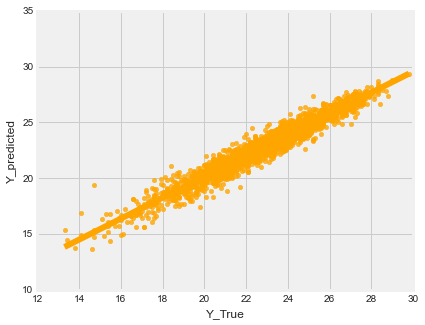

In [498]:
rs,score = random_state_func(XGBRegressor(),x_max1,y_max)
print('Random State : ', rs , ' with r2 score :',score)
rs1,score1 = random_state_func(XGBRegressor(),x_min1,y_min)
print('Random State : ', rs1 , ' with r2 score :',score1)

print('\n\n************** PREDICTIONS for NEXT DAY MAX TEMPRATURE ********************\n\n')

model_predict(XGBRegressor(),rs,x_max1,y_max)
print('\n************** PREDICTIONS for NEXT DAY MIN TEMPRATURE ********************\n')
model_predict(XGBRegressor(),rs1,x_min1,y_min)

Random State :  30  with r2 score : 0.9397394477966557
Random State :  7  with r2 score : 0.9467197635881882


************** PREDICTIONS for NEXT DAY MAX TEMPRATURE ********************


------------ LGBMRegressor() --------------
 R2 Score              :  0.938189327792768
Cross Validation Score :  0.702255834240796
Root Mean Squared Error : 0.7817328263057112
Absolute Mean Square   : 0.6073364814608317


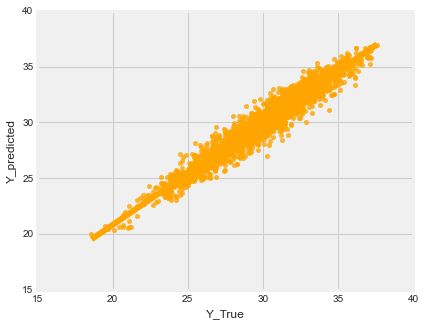


************** PREDICTIONS for NEXT DAY MIN TEMPRATURE ********************

------------ LGBMRegressor() --------------
 R2 Score              :  0.942409936042847
Cross Validation Score :  0.7604674695724082
Root Mean Squared Error : 0.6060508776372406
Absolute Mean Square   : 0.462142291958264


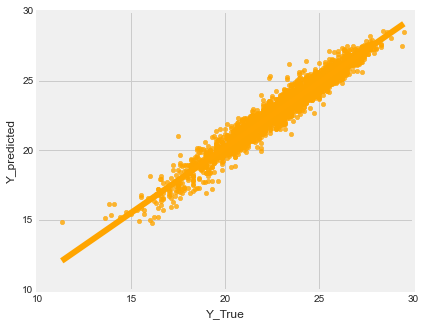

In [499]:
rs,score = random_state_func(LGBMRegressor(),x_max1,y_max)
print('Random State : ', rs , ' with r2 score :',score)
rs1,score1 = random_state_func(LGBMRegressor(),x_min1,y_min)
print('Random State : ', rs1 , ' with r2 score :',score1)

print('\n\n************** PREDICTIONS for NEXT DAY MAX TEMPRATURE ********************\n\n')

model_predict(LGBMRegressor(),rs,x_max1,y_max)
print('\n************** PREDICTIONS for NEXT DAY MIN TEMPRATURE ********************\n')
model_predict(LGBMRegressor(),rs1,x_min1,y_min)

In [500]:
error = []
for i in range(0,16):
    error.append(np.abs(r2_scores[i] - cv_scores[i]))
    

In [501]:
r2_max = []
r2_min = []
rmse_max = []
rmse_min = []
err_max = []
cv_max = []
cv_min = []
err_min = []
for i in range(0,16):
    if(i%2==0):
        r2_max.append(r2_scores[i])
        rmse_max.append(rmse[i])
        err_max.append(error[i])
        cv_max.append(cv_scores[i])
    else:
        r2_min.append(r2_scores[i])
        rmse_min.append(rmse[i])
        err_min.append(error[i])
        cv_min.append(cv_scores[i])
        
    

In [502]:
table_dict_max = {
    'R2 SCORE: ':r2_max,
    
    'CV SCORE': cv_max,
    'RMSE ': rmse_max,
    'Bias/Error': err_max
}
table_dict_min = {
    'R2 SCORE: ':r2_min,
    
    'CV SCORE': cv_min,
    'RMSE ': rmse_min,
    'Bias/Error': err_min
}

In [503]:
score_max = pd.DataFrame(table_dict_max,index=['LR_MAX_T','Rd_MAX_T','Lasso_MAX_T','SVR_MAX_T','DTC_MAX_T',
                                             'RF_MAX_T','XGB_MAX_T','LGB_MAX_T'  ])

score_min = pd.DataFrame(table_dict_min,index=['LR_MIN_T','Rd_MIN_T','Lasso_MIN_T','SVR_MIN_T','DTC_MIN_T',
                                             'RF_MIN_T','XGB_MIN_T','LGB_MIN_T'  ])

In [504]:
 score_max

,R2 SCORE:,CV SCORE,RMSE,Bias/Error
LR_MAX_T,0.813405,0.682731,1.378321,0.130674
Rd_MAX_T,0.813405,0.682751,1.378319,0.130654
Lasso_MAX_T,0.601619,0.463701,1.934042,0.137918
SVR_MAX_T,0.910826,0.682987,0.938955,0.227839
DTC_MAX_T,0.805855,0.373041,1.375487,0.432813
RF_MAX_T,0.918115,0.679353,0.899764,0.238763
XGB_MAX_T,0.934070,0.658165,0.791710,0.275906
LGB_MAX_T,0.938189,0.702256,0.781733,0.235933


#### NEXT_TMAX has highest r2 score of LGBM Model. but error is high,  DTC OVERFITS  the models at the highest.

#### we choose least biased model i.e  Linear Regression/ RIDGE
 - Choosen Model: Ridge , least overfitted model, other models are highly overfitting.

In [505]:
score_min

,R2 SCORE:,CV SCORE,RMSE,Bias/Error
LR_MIN_T,0.856908,0.764113,0.955307,0.092795
Rd_MIN_T,0.856903,0.764127,0.955324,0.092776
Lasso_MIN_T,0.638991,0.521246,1.459559,0.117744
SVR_MIN_T,0.932288,0.702796,0.640892,0.229492
DTC_MIN_T,0.805392,0.490467,1.086504,0.314925
RF_MIN_T,0.914742,0.745567,0.737400,0.169175
XGB_MIN_T,0.942692,0.725853,0.608543,0.216839
LGB_MIN_T,0.942410,0.760467,0.606051,0.181942


#### NEXT_TMin  
has highest r2 score of LGBM Model. but error is high,  DTC OVERFITS  the models at the highest.

#### we choose least biased model i.e  Linear Regression/ RIDGE
 - Choosen Model: Ridge , least overfitted model, other models are highly overfitting. and .85 % r2 score  model is good.
 
     

### HYPERTUNING RIDGE MODEL FOR Next TMAX and NEXT TMin

In [515]:
params = {
        'alpha': [.1,.2,.5,.01,.05,1,2],
    'solver':[ 'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    
}
grid = RandomizedSearchCV(Ridge(),params,cv=10,n_iter=20,scoring='r2')

In [516]:
grid.fit(x_transformed_maxT,y_max)

RandomizedSearchCV(cv=10, estimator=Ridge(), n_iter=20,
                   param_distributions={'alpha': [0.1, 0.2, 0.5, 0.01, 0.05, 1,
                                                  2],
                                        'solver': ['auto', 'svd', 'cholesky',
                                                   'lsqr', 'sparse_cg', 'sag',
                                                   'saga']},
                   scoring='r2')

In [517]:
grid.best_estimator_

Ridge(alpha=0.01, solver='saga')

Random State :  43  with r2 score : 0.8151906649950503


************** PREDICTIONS for NEXT DAY MAX TEMPRATURE ********************


------------ Ridge(alpha=0.01, solver='saga') --------------
 R2 Score              :  0.8134153838140248
Cross Validation Score :  0.6827728186710043
Root Mean Squared Error : 1.3782814359636852
Absolute Mean Square   : 1.0519582432015777


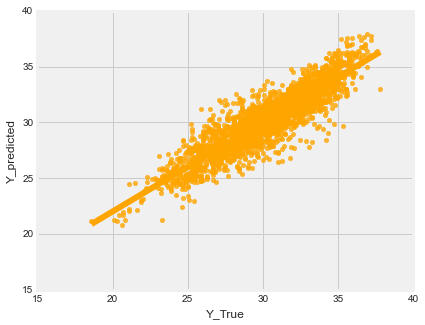

In [521]:
rs,score = random_state_func(Ridge(),x_transformed_maxT,y_max)
print('Random State : ', rs , ' with r2 score :',score)


print('\n\n************** PREDICTIONS for NEXT DAY MAX TEMPRATURE ********************\n\n')

model_predict(Ridge(alpha=.01, solver='saga'),rs,x_transformed_maxT,y_max)


#### HYPER TUNE TMIN

In [571]:
params = {
        'alpha': [.1,.2,.5,.01,.05,1,2],
    'solver':[ 'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
    
}
grid = RandomizedSearchCV(Ridge(),params,cv=10,n_iter=30,scoring='r2')


In [572]:

grid.fit(x_transformed_minT,y_min)

grid.best_estimator_

Ridge(alpha=0.01, solver='sag')

Random State :  7  with r2 score : 0.8591642397609949


************** PREDICTIONS for NEXT DAY MAX TEMPRATURE ********************


------------ Ridge(alpha=0.01, solver='sag') --------------
 R2 Score              :  0.8569166011942322
Cross Validation Score :  0.7640563472337234
Root Mean Squared Error : 0.9552783341116646
Absolute Mean Square   : 0.7489802477664222


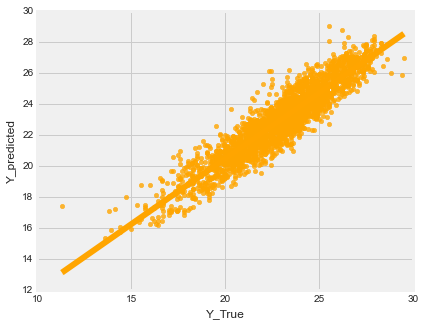

In [573]:
rs,score = random_state_func(Ridge(),x_transformed_minT,y_min)
print('Random State : ', rs , ' with r2 score :',score)


print('\n\n************** PREDICTIONS for NEXT DAY MAX TEMPRATURE ********************\n\n')

model_predict(Ridge(alpha=0.01, solver='sag'),rs,x_transformed_minT,y_min)


#### EVALUATING TMAX MODEL:

In [581]:
    model = Ridge(alpha=.01, solver='saga')
    x_train,x_test,y_train,y_test = train_test_split(x_transformed_maxT,y_max,test_size=.33,random_state=43)
    model.fit(x_train,y_train)
    predictions = model.predict(x_test)
    cv_score = np.mean(cross_val_score(model,x_transformed_maxT,y_max,cv=10,scoring='r2'))
     
    print('\n------------',model,'--------------')
    print('\n R2 Score              : ', r2_score(y_test,predictions))
    print('\nCross Validation Score : ',cv_score)
    print('\nRoot Mean Squared Error :',np.sqrt(mean_squared_error(y_test,predictions)))
    print('\nAbsolute Mean Square   :', mean_absolute_error(y_test,predictions))
    err = np.abs(r2_score(y_test,predictions) - cv_score)
    print('\nError (validation score - training score)    :'    , err)
    
  


------------ Ridge(alpha=0.01, solver='saga') --------------

 R2 Score              :  0.8134038285336831

Cross Validation Score :  0.6827213076397859

Root Mean Squared Error : 1.3783241141386935

Absolute Mean Square   : 1.0519612107854244

Error (validation score - training score)    : 0.1306825208938972


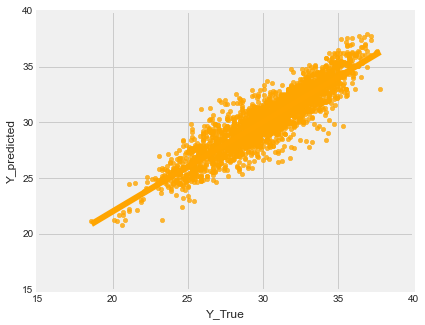

In [582]:
  
    plt.figure(figsize=(6,5))
    
    sb.regplot(y_test,predictions,color='orange',)
    plt.xlabel('Y_True')
    plt.ylabel('Y_predicted')
    plt.show()    

In [583]:
# distribution of Error (difference btw y_true and y_predicted should follow gaussian structure)

Text(0.5, 0, 'Error Variance Distribution')

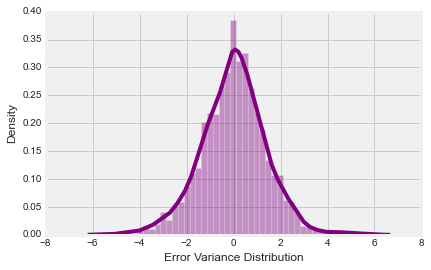

In [584]:
plt.figure()
sb.distplot(y_test - predictions,color='purple')
plt.xlabel('Error Variance Distribution')

#### Error variance follow standard normalized structure, suggesting that  the model is not overfitting.

### EVALUATING MODEL FOR TMIN NEXT TARGET VARIABLE

In [578]:
    model1 = Ridge(alpha=0.01, solver='sag')
    x_train,x_test,y_train,y_test = train_test_split(x_transformed_minT,y_min,test_size=.33,random_state=43)
    model1.fit(x_train,y_train)
    predictions = model1.predict(x_test)
    cv_score = np.mean(cross_val_score(model1,x_transformed_minT,y_min,cv=10,scoring='r2'))
     
    print('\n------------',model,'--------------')
    print('\n R2 Score              : ', r2_score(y_test,predictions))
    print('\nCross Validation Score : ',cv_score)
    print('\nRoot Mean Squared Error :',np.sqrt(mean_squared_error(y_test,predictions)))
    print('\nAbsolute Mean Square   :', mean_absolute_error(y_test,predictions))
    err = np.abs(r2_score(y_test,predictions) - cv_score)
    print('\nError (validation score - training score)    :'    , err)
    
  



------------ Ridge(alpha=0.01, solver='sag') --------------

 R2 Score              :  0.8549041981462145

Cross Validation Score :  0.7641072054313625

Root Mean Squared Error : 0.9445354523608704

Absolute Mean Square   : 0.742516282525225

Error (validation score - training score)    : 0.09079699271485209


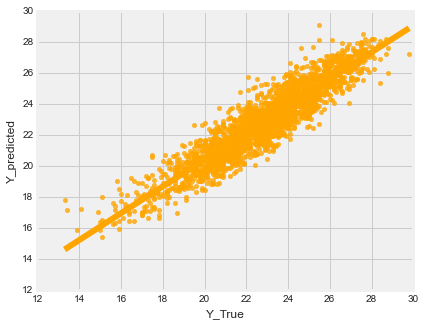

Text(0.5, 0, 'Error Variance Distribution')

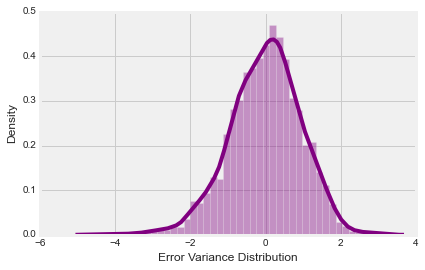

In [579]:

    plt.figure(figsize=(6,5))
    
    sb.regplot(y_test,predictions,color='orange',)
    plt.xlabel('Y_True')
    plt.ylabel('Y_predicted')
    plt.show()    
   

    plt.figure()
    sb.distplot(y_test - predictions,color='purple')
    plt.xlabel('Error Variance Distribution')



###### distribution of Error (difference btw y_true and y_predicted should follow gaussian structure)


#### Error variance follow standard normalized structure,suggesting that the model is not overfitting.

### SAVING TMAX MODEL, TMIN MODEL


In [587]:
### SAVING TMIN
import joblib

joblib.dump(model1, 'next_Tmin_Ridge.pk1')

joblib.load('next_Tmin_Ridge.pk1')

Ridge(alpha=0.01, solver='sag')

In [588]:
### SAVING TMAX MODEL

import joblib

joblib.dump(model, 'next_Tmax_Ridge.pk1')

joblib.load('next_Tmax_Ridge.pk1')

Ridge(alpha=0.01, solver='saga')